# Lending Club Case Study - Upgrad

### Aim of this case study
Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss) to any lending company. Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labeled as 'charged-off' are the 'defaulters'. 
<br><br>
If we are able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
<br><br>
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.


Following are the steps to perform exploratory data analysis on given data set :
1. Load the data set, import required libraries, understand 
2. Data Cleaning and Understanding
3. Univariate analysis
4. Bivariate analysis
5. Recommendation based on analysis


## 1. Loading data and Data understanding

Importing required libraries and loading csv data into data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


loan = pd.read_csv("loan.csv",low_memory=False)

Understand basic information of data such as shape, info, description etc.

In [2]:
loan.shape

(39717, 111)

In [3]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Initial Data set summary:
##### 39717 records
##### 111 columns
##### records consists int64, float64 and object type of attributes.

## 2. Data Cleaning
Analyze data and perform cleaning on it

Check all the columns with all NULL values and drop them

In [5]:
loan.columns[loan.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

Drop these columns from data set.

In [6]:
loan.drop(loan.columns[loan.isnull().all()],axis=1,inplace=True)
loan.shape

(39717, 57)

54 columns dropped. Now check NULL values for each column with its percentages and decide a threshold to drop it

In [7]:
percent_missing = loan.isnull().sum() * 100 / len(loan)
missing_value_df = pd.DataFrame({'column_name': loan.columns,'percent_missing': percent_missing})
missing_value_df[percent_missing>0]

,column_name,percent_missing
emp_title,emp_title,6.191303
emp_length,emp_length,2.706650
desc,desc,32.580507
title,title,0.027696
mths_since_last_delinq,mths_since_last_delinq,64.662487
mths_since_last_record,mths_since_last_record,92.985372
revol_util,revol_util,0.125891
last_pymnt_d,last_pymnt_d,0.178765
next_pymnt_d,next_pymnt_d,97.129693
last_credit_pull_d,last_credit_pull_d,0.005036


Set threshold to 25% for missing value data. Dropped 4  columns having large amount of data is missing

In [8]:
missing_value_threshold = 25
loan.drop(missing_value_df[percent_missing>missing_value_threshold].index,axis=1,inplace=True)
loan.shape

(39717, 53)

drop column with same values for all the rows to separate out from data analysis

In [9]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Drop all 9 columns which has same value

In [10]:
loan.drop(loan.nunique()[loan.nunique()<2].index,axis=1,inplace=True)
loan.shape

(39717, 44)

In [11]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Update the properties of pandas to display all columns.

In [12]:
pd.set_option('display.max_columns', None)
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0


 Drop following columns during data analysis since they don't add value:
 
- **zip_code** - It could have played a major role but last two digits are masked
- **member_id** - We will consider id as unique identifier as of now so dropping this
- **emp_title** - It is user input text so has very little categorical data properties hence dropping it
- **url** - Nothing special can be figured out other than loan_id which we already have as id
- **title** - Its user input field which has not significance - same data is summarized in purpose

In [13]:
loan.drop(['url','title','zip_code','member_id','emp_title'], axis = 1, inplace = True)
loan.shape

(39717, 39)

#### Scan all categorical column values to identify if any rows OR/AND columns can be dropped

In [14]:
loan.term.value_counts(dropna=False)

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [15]:
loan.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Replace all NaN occurances with "Unidentified" which we can use to plot a graph considering column's high correlation with defaults

In [16]:
loan.pub_rec_bankruptcies.fillna('Unidentified',inplace=True)
loan.pub_rec_bankruptcies.value_counts(dropna=False)

0.0             37339
1.0              1674
Unidentified      697
2.0                 7
Name: pub_rec_bankruptcies, dtype: int64

In [17]:
loan.verification_status.value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [18]:
loan.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Drop records with "Current" loan status records as we cannot judge or decide if the loan is going  to be bad or not

In [19]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [20]:
loan.pub_rec.value_counts(dropna=False)

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [21]:
loan.home_ownership.value_counts(dropna=False)

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [22]:
loan[loan.home_ownership=='NONE']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39318,231321,10000,10000,1228.06,36 months,7.75%,312.22,A,A3,5 years,NONE,22200.0,Not Verified,Jan-08,Fully Paid,debt_consolidation,VA,5.24,0,Apr-94,0,9,0,4767,8.70%,22,0.0,0.0,11239.620890,1380.00,9999.99,1239.63,0.0,0.0,0.0,Feb-11,313.59,Jan-11,Unidentified
39659,121568,4000,4000,1925.00,36 months,9.64%,128.41,B,B4,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,other,CA,15.00,0,May-99,1,6,0,8155,14.90%,8,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,Unidentified
39660,121535,2800,2800,1625.00,36 months,8.70%,88.65,B,B1,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,other,MA,15.00,0,May-99,1,6,0,8155,14.90%,8,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,Unidentified


NONE as home_ownership does not make sense to analysis but we will keep this records for other entries namesake


In [23]:
loan.grade.value_counts(dropna=False)

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [24]:
loan.inq_last_6mths.value_counts(dropna=False)

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

In [25]:
loan.delinq_2yrs.value_counts(dropna=False)

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [26]:
loan.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

find the median of the records excluding NaN and then will fill it with the found record. Avoid 'mean' of the records as 10+ year bucket have most entries.

In [27]:
loan.emp_length.value_counts().median()

3194.0

In [28]:
loan.emp_length.fillna('5 years',inplace=True)

In [29]:
loan.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
5 years      4227
3 years      4012
4 years      3342
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [30]:
loan.purpose.value_counts(dropna=False)

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [31]:
loan.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [32]:
loan.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

Rest of the columns are seems to be non categorical but can be bucketize.Let's analyze them further in next steps
<br><br>
#### Scan other columns which might be irrelevant in data and business problem understanding


In [33]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

Following columns seems to be irrelevant as well:
- **total_rec_late_fee** : It is a post loan data or relevant to current status loan data
- **recoveries** : post charge off gross recovery not valid input for finding default reason
- **collection_recovery_fee** : Not valid input for finding default reason
- **last_pymnt_d** : It is a post loan data or relevant to current status loan data
- **last_pymnt_amnt** : It is a post loan data or relevant to current status loan data
- **out_prncp** : Remaining principle it is a post loan data or relevant to current status loan data
- **out_prncp_inv** : Remaining principle of investor it is a post loan data or relevant to current status loan data
- **earliest_cr_line** : Not much can be deduced from this easily would need to find complex correlation
- **last_credit_pull_d** : Not much can be deduced from this easily would need to find complex correlation
- **issue_d** : It has no significance for defaulting the loan
- **open_acc** : open_acc and total_acc seems similar we will analyze further


Drop these 11 columns

In [34]:
loan.drop(["issue_d","open_acc","out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","earliest_cr_line","last_credit_pull_d"],axis=1,inplace=True)

In [35]:
loan.shape

(38577, 28)

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

It seems "revol_util" has some issue.Let's investigate all other records has values equal to length of loan dataframe

In [37]:
# We will check null values first
loan.revol_util.isnull().sum()

50

Replace null values with relevant values by finding mean and median.It seems mean should do justice to distribution


In [38]:
print("mean : ",loan.revol_util.value_counts().mean())
print("median : ",loan.revol_util.value_counts().median())

mean :  35.4108455882353
median :  36.0


Replace the revol_util with mean as follows

In [39]:
loan.revol_util.fillna('35.41',inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

#### Data Formatting
Format data types to relevant data types for analysis


In [40]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.0


Change following columns data type and clean up column if required:

- **revol_util** : removing percentage symbol and converting it to float64 for bucketing and plotting
- **emp_length** : Introduce another column job_experiance to create a order categorical column
- **funded_amnt_inv** : Changing it to int64 from float64
- **int_rate** : removing percentage symbol and converting it to float64 for bucketing and plotting


In [41]:
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].astype(int)

In [42]:
loan["int_rate"] = loan["int_rate"].apply(lambda x : x.replace("%","")).astype(float)

In [43]:
loan["revol_util"] = loan["revol_util"].apply(lambda x : x.replace("%","")).astype(float)

In [44]:
loan["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
5 years      4227
3 years      4012
4 years      3342
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [45]:
loan["job_experiance"] = loan["emp_length"].apply(lambda x : x.replace("+ years","")
                                                             .replace(" years","")
                                                              .replace(" year","")
                                                             .replace("< 1","0")
                                                 ).astype(int)

In [46]:
loan["job_experiance"].value_counts()

10    8488
0     4508
2     4291
5     4227
3     4012
4     3342
1     3169
6     2168
7     1711
8     1435
9     1226
Name: job_experiance, dtype: int64

In [47]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  int32  
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

In [48]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies,job_experiance
0,1077501,5000,5000,4975,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.0,10
1,1077430,2500,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.0,0
2,1077175,2400,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.0,10
3,1076863,10000,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,0.0,10
5,1075269,5000,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.0,3


Rename some columns for better business understanding
<br>
    

In [49]:
loan.rename(columns={'funded_amnt_inv' : 'funded_amnt_by_investor', 'annual_inc': 'annual_income', 
                     'dti': 'debt_to_income_ration', 'delinq_2yrs': '30_day_delinq_2yrs',
                     'revol_bal' : 'credit_balance', 'revol_util': 'credit_uitilization', 'total_acc' :'credit_accounts',
                     'total_pymnt':'pymnt_received', 'total_pymnt_inv' : 'pymnt_received_by_inv',
                     'total_rec_prncp':'principal_amnt_received','total_rec_int':'interest_amnt_received'}, inplace=True)


In [50]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_by_investor  38577 non-null  int32  
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  float64
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_income            38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

Based on business understanding,Following columns can be dropped as they might not decide whether a loan gets defualt or not:

- **pymnt_received_by_inv** : total payment received by investor
- **principal_amnt_received** : total principal amount recovered
- **interest_amnt_received** : total interest amount recovered
- **credit_balance** : It represents the balance in credit account at closure has no significance in predicting loan default
- **credit_uitilization** : percentage of credit utilization at closure has no significance in predicting loan default
- **pymnt_received** : total payment received by firm


In [51]:
loan.drop(["credit_balance","credit_uitilization","pymnt_received","pymnt_received_by_inv","principal_amnt_received",
           "interest_amnt_received"],axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_by_investor  38577 non-null  int32  
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  float64
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_income            38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

#### Data cleaning summary
- removed all NULL and single/same value columns from data. Also, removed records corresponding to current loan status.
- Scanned all the columns and cleaned/formatted our data as per our need.
- 28 columns Left.
- Now all in either categorical form of data type Object or continues (numerical) form of data type float and int.
- Renamed columns for better understanding when we will plot these values


## 3. Univariate Analysis

Now we will simple load columns into different graphical representation and will try to make sense out of it, but first we need to categorize columns into two category as follows
1. Category Columns
1. Numeric Columns

Let's find out which columns are categorical or Numeric based on its data type and data readme sheet

In [52]:
categorical_columns = loan.select_dtypes(include=['object']).columns.to_list()
numerical_columns = loan.select_dtypes(exclude=['object']).columns.to_list()
print(categorical_columns)
print(numerical_columns)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies']
['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_by_investor', 'int_rate', 'installment', 'annual_income', 'debt_to_income_ration', '30_day_delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'credit_accounts', 'job_experiance']


We will drop 'id' from this list as it as no indicator significance

In [53]:
numerical_columns = numerical_columns[1:]
print(numerical_columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_by_investor', 'int_rate', 'installment', 'annual_income', 'debt_to_income_ration', '30_day_delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'credit_accounts', 'job_experiance']


#### Numerical columns

Plot a box plot for numerical values and check for outliers and correct the data accordingly.
To achieve this ,create a function and run it through for loop for all numerical columns 

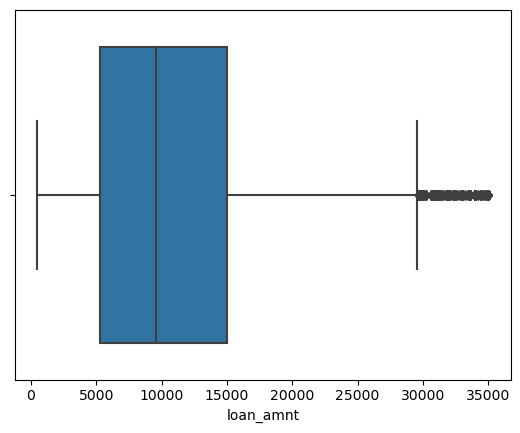

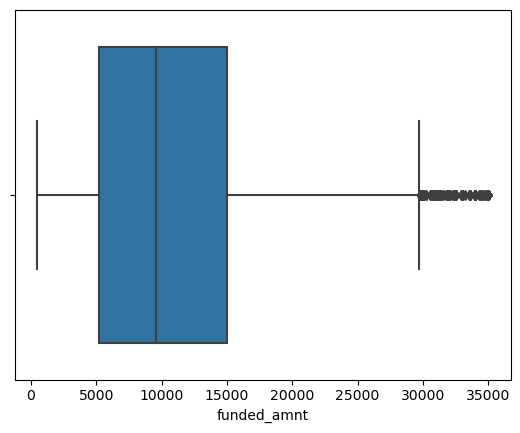

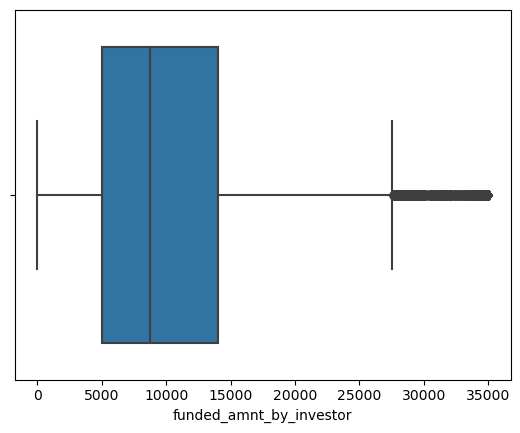

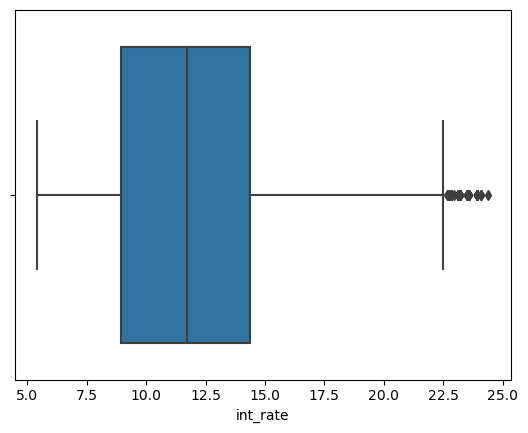

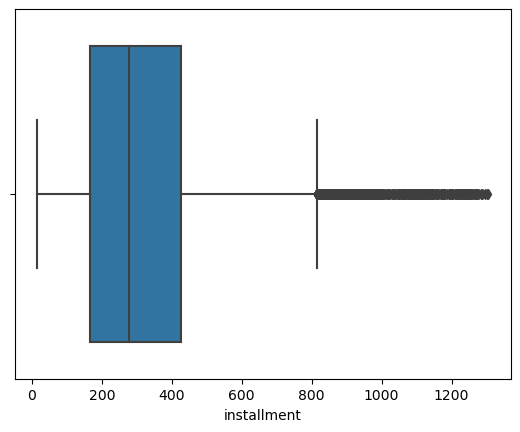

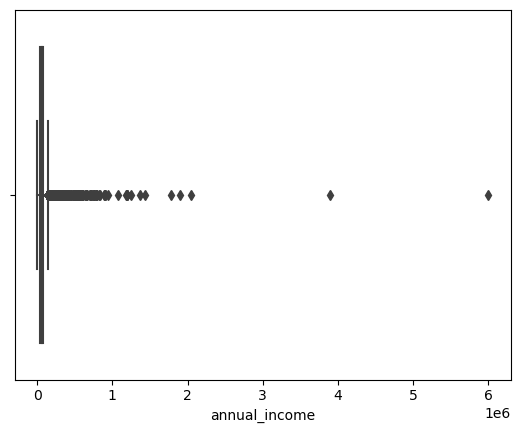

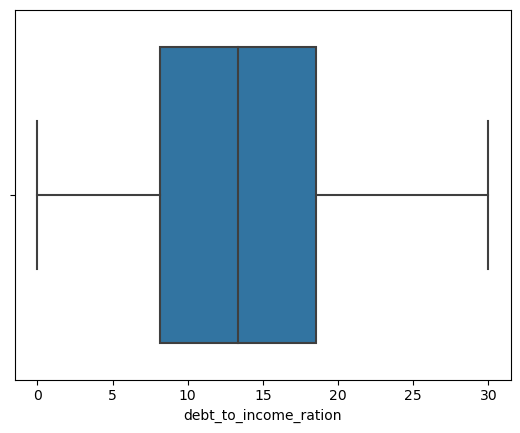

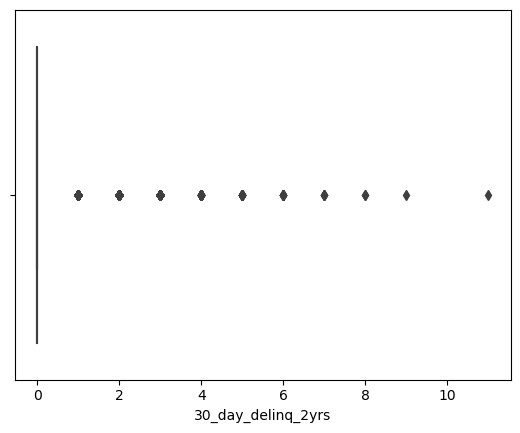

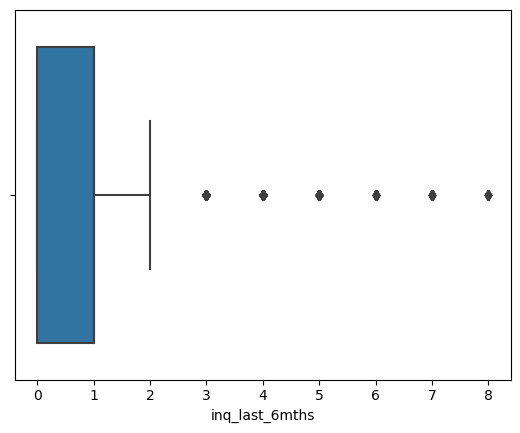

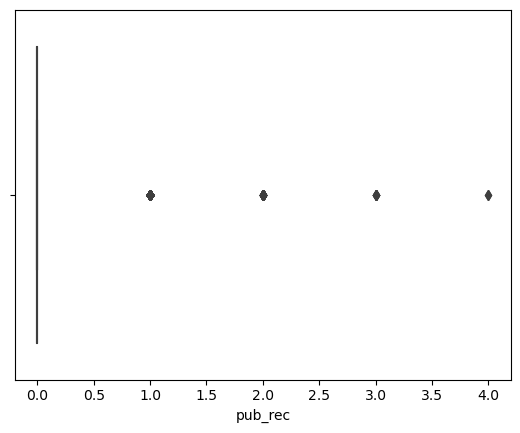

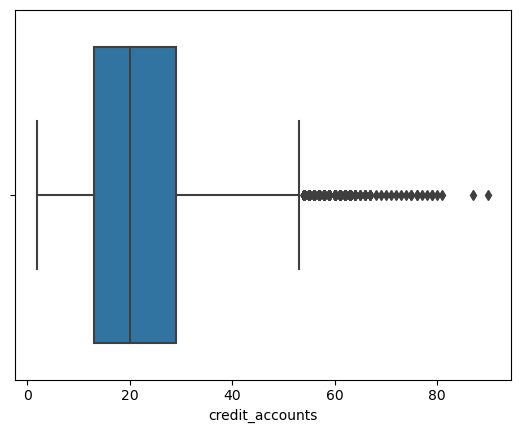

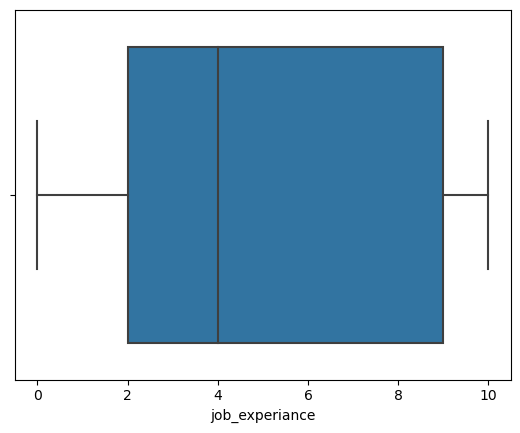

In [54]:
def box_plot(series):
    sns.boxplot(x=series)
    plt.show()


for column_name in numerical_columns:
    box_plot(loan[column_name])

### Following Observed:
- **'annual income' has some outliers above 2 million.**
- **'credit accounts' has some outliers above 70 to 80.**
- **Let's review them and remove them.**

In [55]:
loan[loan["annual_income"]>2000000]

,id,loan_amnt,funded_amnt,funded_amnt_by_investor,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_status,purpose,addr_state,debt_to_income_ration,30_day_delinq_2yrs,inq_last_6mths,pub_rec,credit_accounts,pub_rec_bankruptcies,job_experiance
29639,519954,25000,15500,11430,60 months,10.62,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,Fully Paid,home_improvement,NM,0.20,0,3,0,32,0.0,3
30107,513542,5000,5000,5000,36 months,12.73,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,Fully Paid,home_improvement,CA,0.01,0,1,0,10,0.0,10
39089,269818,8450,8450,3747,36 months,12.29,281.84,C,C5,< 1 year,RENT,2039784.0,Not Verified,Fully Paid,debt_consolidation,FL,0.13,0,1,0,11,Unidentified,0


Loan status for these records are "Fully Paid",Let's drop these records as these are just 3 records in a pool of 30k records.

In [56]:
loan[loan["credit_accounts"]>70]

,id,loan_amnt,funded_amnt,funded_amnt_by_investor,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_status,purpose,addr_state,debt_to_income_ration,30_day_delinq_2yrs,inq_last_6mths,pub_rec,credit_accounts,pub_rec_bankruptcies,job_experiance
336,1065110,35000,23150,21739,60 months,17.27,578.71,D,D3,8 years,MORTGAGE,208000.0,Source Verified,Fully Paid,debt_consolidation,MD,7.94,0,0,0,79,0.0,8
9464,848821,35000,35000,34950,36 months,13.99,1196.05,C,C3,10+ years,MORTGAGE,164000.0,Verified,Fully Paid,home_improvement,NC,14.08,0,3,0,77,0.0,10
13595,779179,18000,18000,17975,60 months,13.99,418.74,C,C3,10+ years,MORTGAGE,76000.0,Source Verified,Fully Paid,debt_consolidation,NV,18.25,0,2,0,87,0.0,10
14465,765206,14400,14400,14400,60 months,13.99,334.99,C,C3,8 years,OWN,225000.0,Source Verified,Fully Paid,other,MD,7.96,2,1,0,75,0.0,8
14747,761083,6000,6000,6000,36 months,10.59,195.27,B,B2,10+ years,MORTGAGE,98000.0,Not Verified,Fully Paid,home_improvement,GA,20.34,0,0,0,72,0.0,10
19207,673379,10575,10575,10550,60 months,21.22,287.40,G,G4,< 1 year,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,DC,14.50,0,0,0,78,0.0,0
19239,678829,6000,6000,5923,36 months,6.92,185.05,A,A3,5 years,MORTGAGE,126000.0,Verified,Fully Paid,major_purchase,TX,12.74,0,0,0,76,0.0,5
19720,670547,10000,10000,10000,36 months,17.88,360.93,E,E5,10+ years,RENT,100000.0,Verified,Charged Off,debt_consolidation,WI,17.72,1,3,0,74,0.0,10
25446,584823,9000,9000,9000,36 months,6.76,276.91,A,A2,10+ years,MORTGAGE,72000.0,Not Verified,Fully Paid,debt_consolidation,MD,17.92,0,0,0,79,0.0,10
29291,523116,12000,12000,11897,60 months,19.41,314.01,F,F4,10+ years,MORTGAGE,75996.0,Source Verified,Fully Paid,major_purchase,TX,16.49,0,1,0,81,0.0,10


In [57]:
len(loan[loan["credit_accounts"]>70])

16

Here as well the records above 70 credit lines has loan status as fully paid and there are only 16 records which we can drop

In [58]:
loan = loan[loan["annual_income"]<2000000]
loan = loan[loan["credit_accounts"]<70]

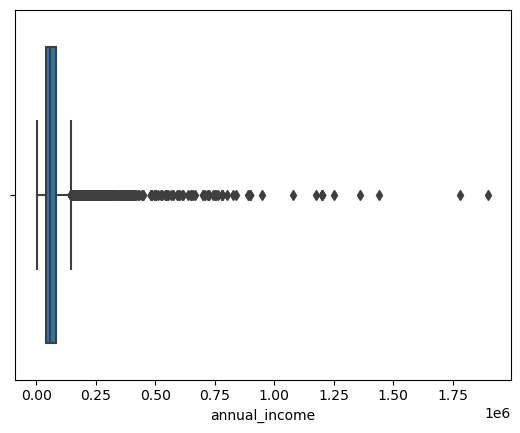

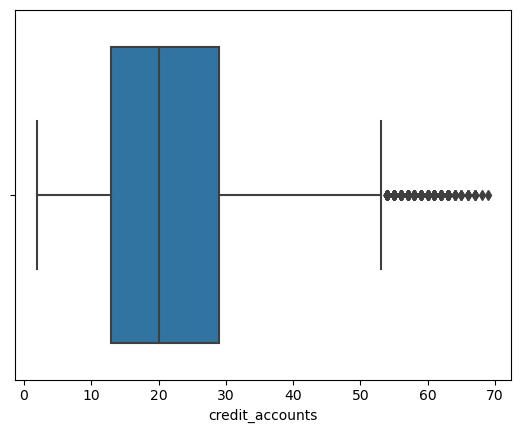

In [59]:
for column_name in ["annual_income","credit_accounts"]:
    box_plot(loan[column_name])

We can still see there are outliers above 1 million which we can drop. Credit accounts now seems nicely distributed

In [60]:
loan = loan[loan["annual_income"]<1000000]

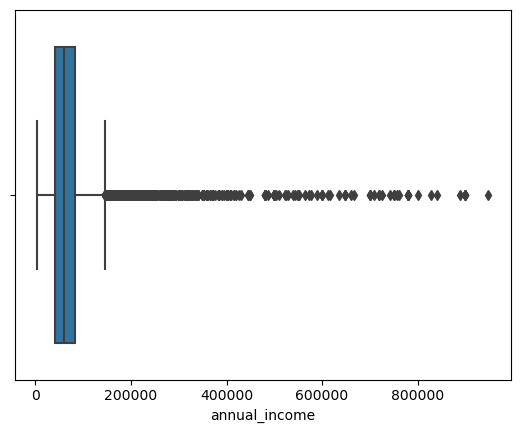

In [61]:
box_plot(loan["annual_income"])

Now lets plot histogram of numerical data to see the distribution so that we get good understanding of bins which we might need also we will plot hue based on loan status to see if we can get any understanding from it

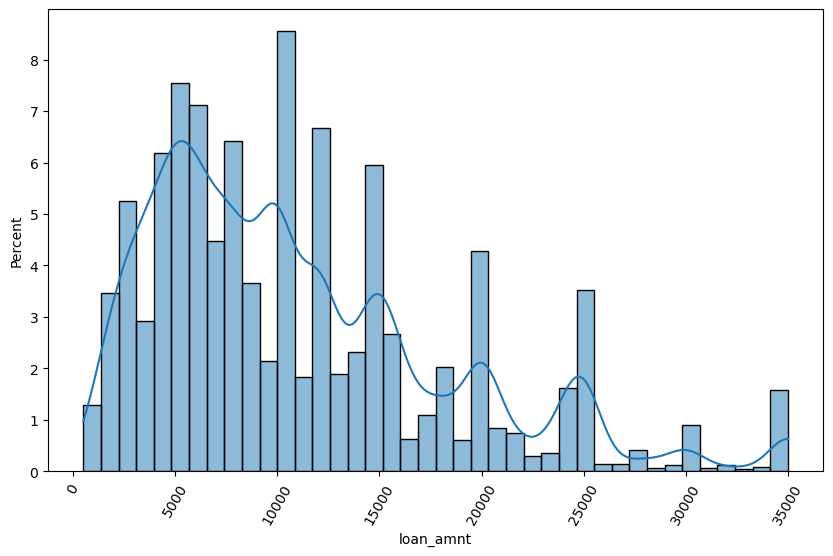

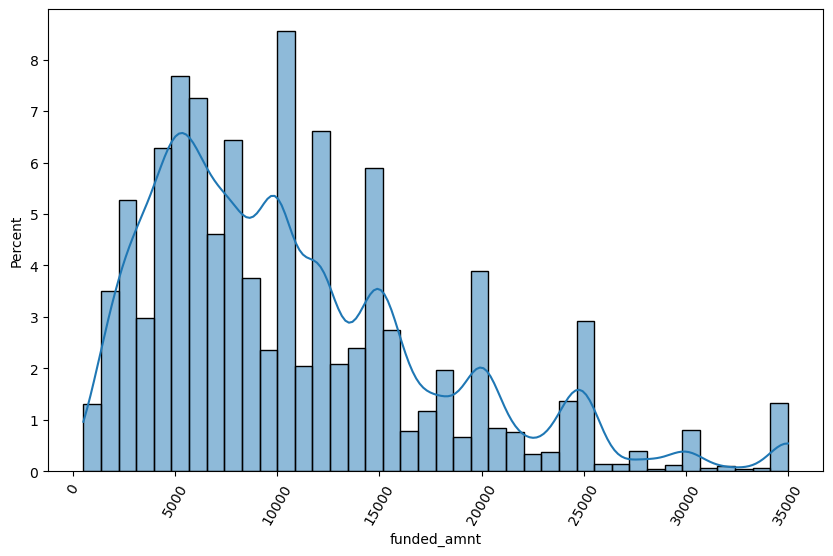

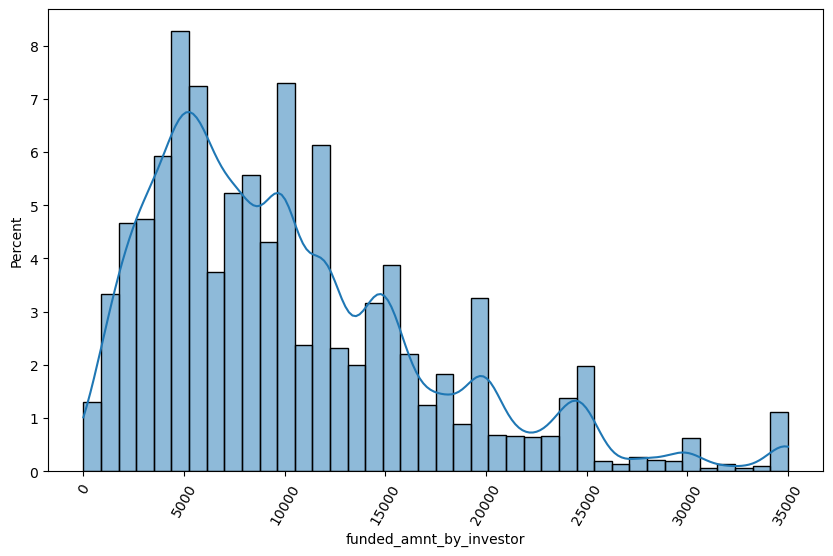

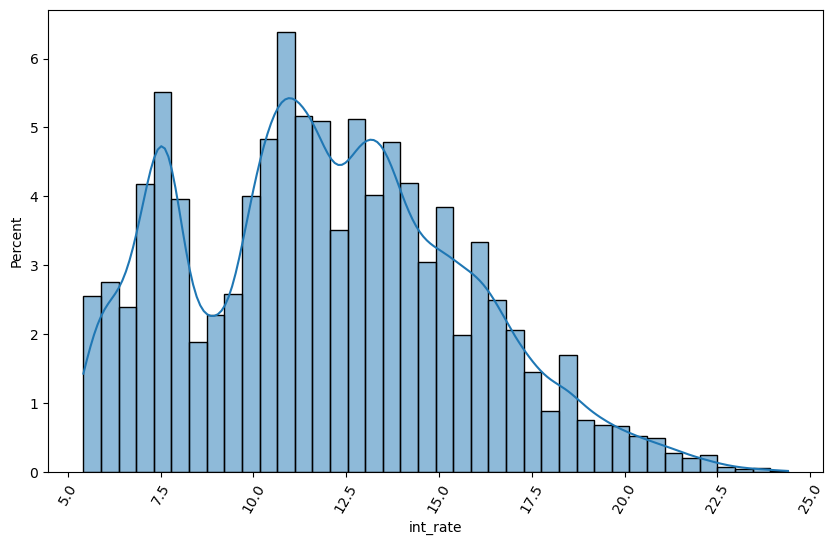

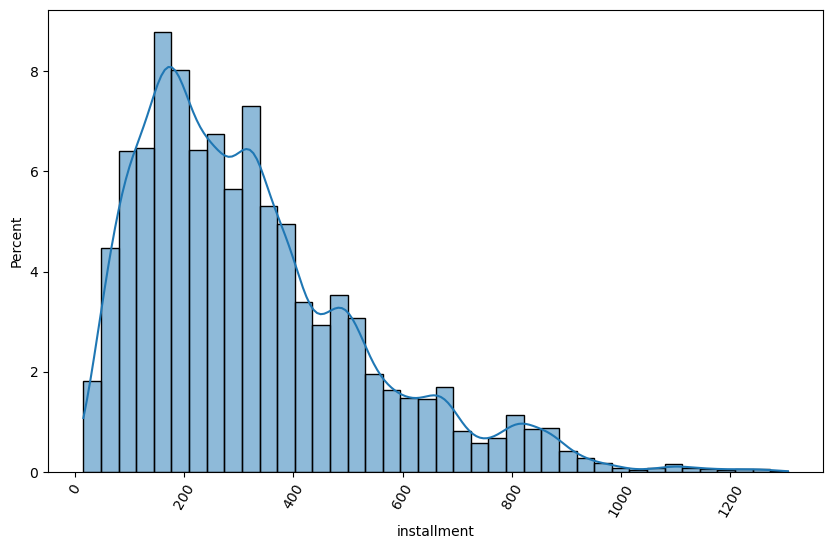

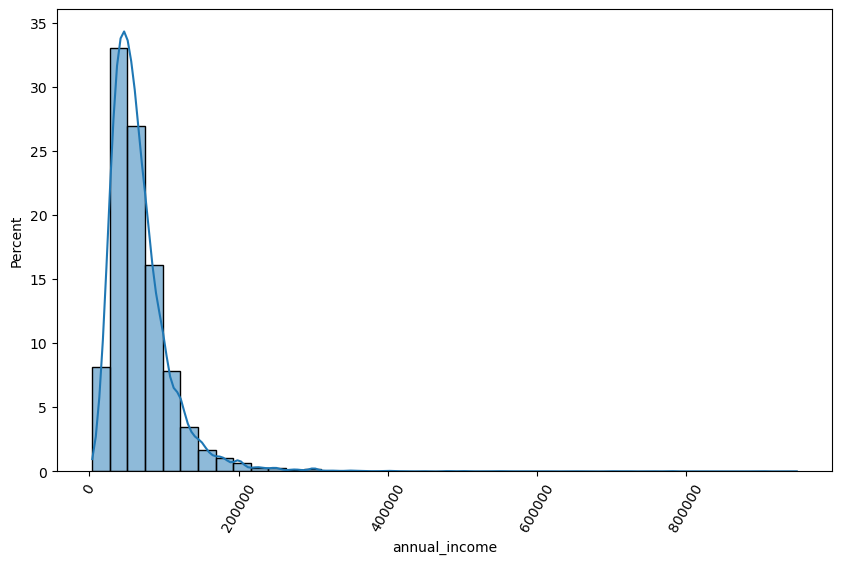

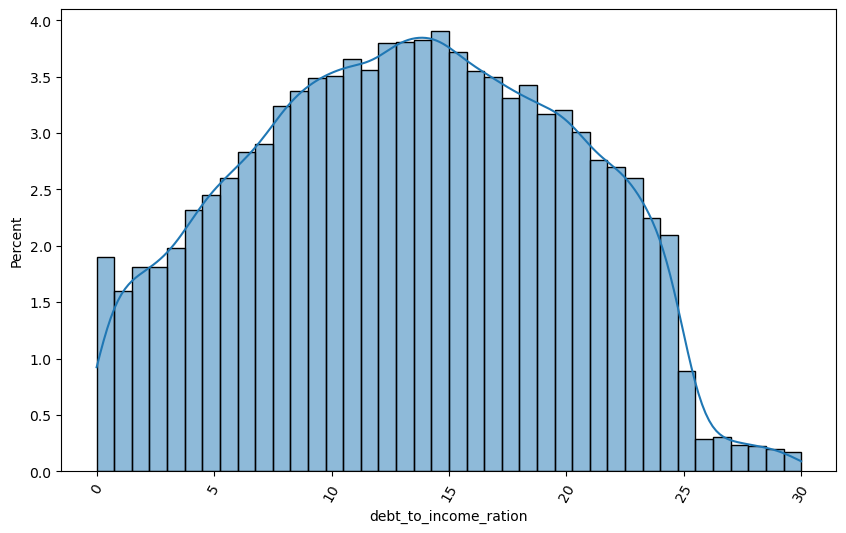

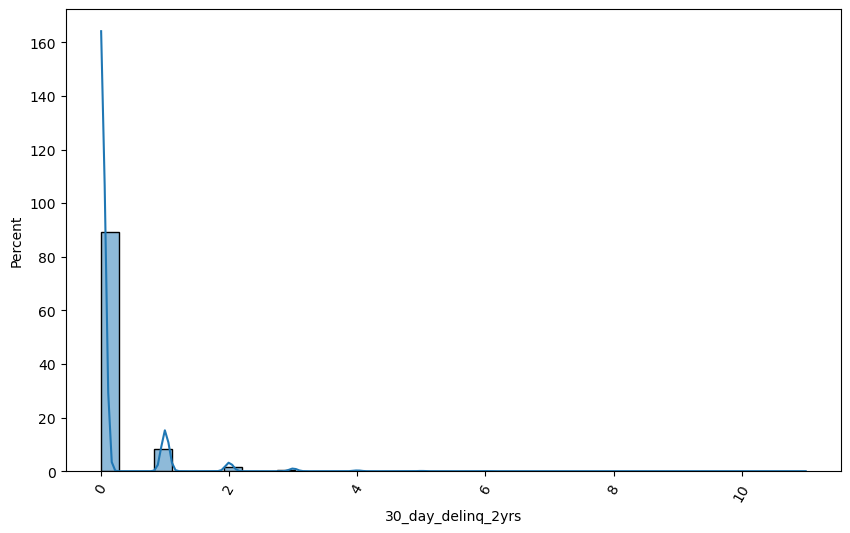

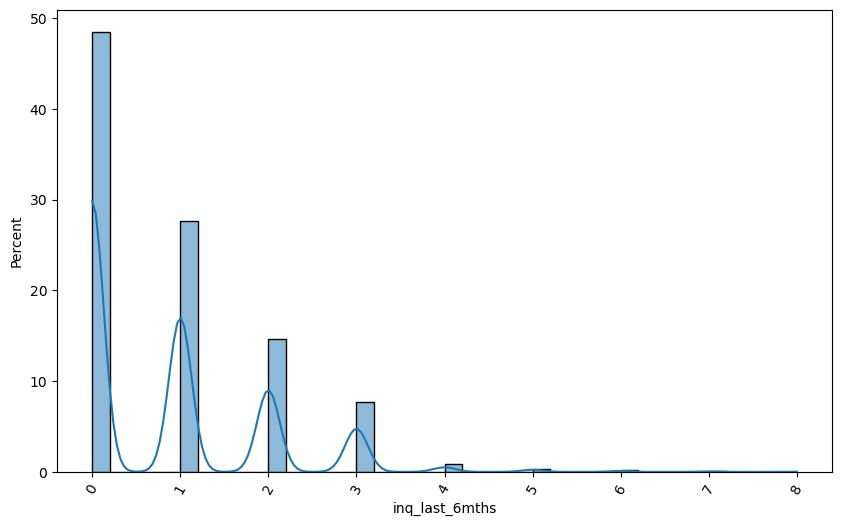

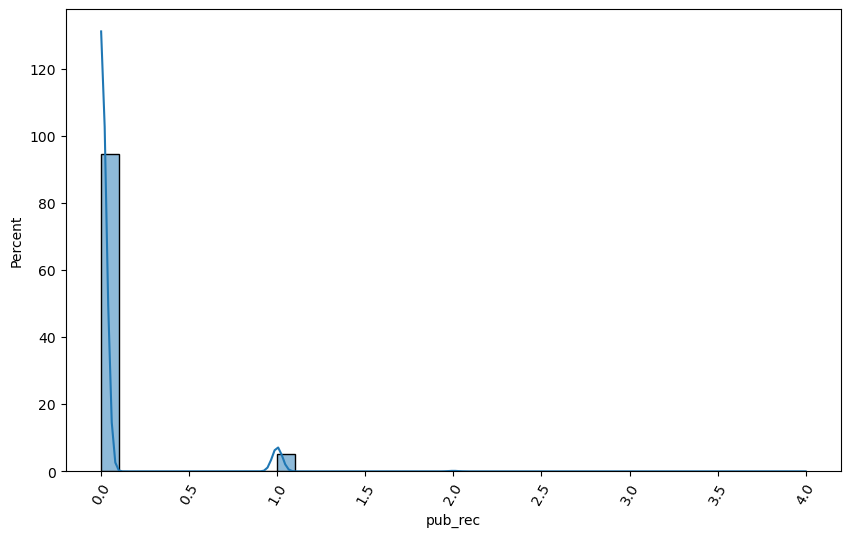

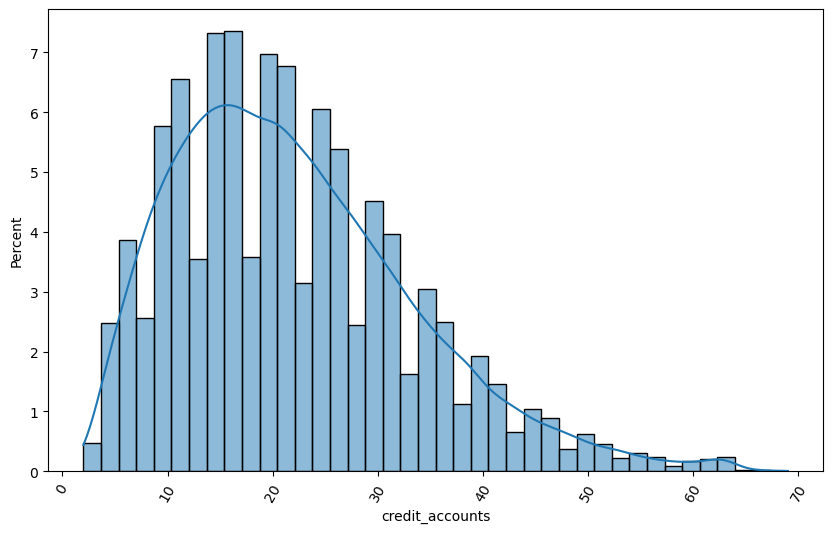

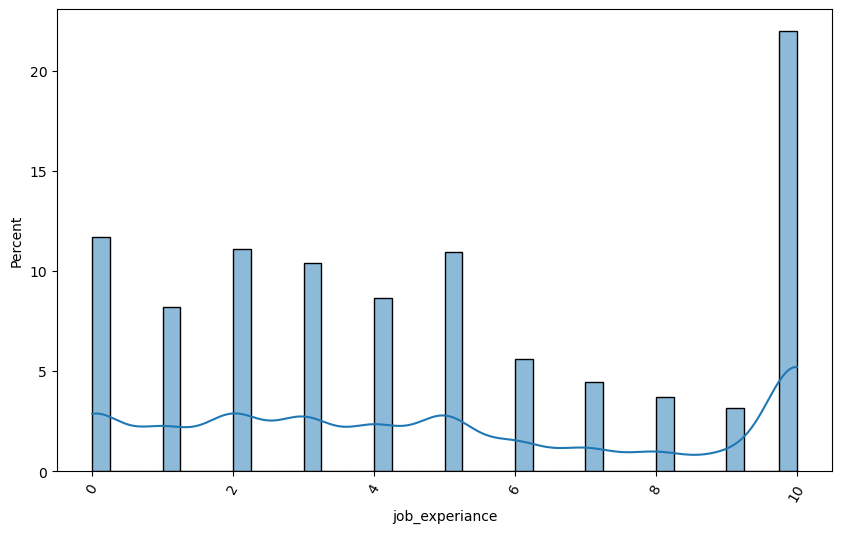

In [62]:
def hist_plot(df,column_name,kdeSetting=True,commonNormSetting=True,multipleSetting="layer",hueSetting=None):
    # setting the dimensions of the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data = df,x=df[column_name],kde=kdeSetting,bins=40,stat='percent',hue=hueSetting,common_norm=commonNormSetting,multiple=multipleSetting)
    plt.xticks(rotation=60)
    plt.show()
    
for column_name in numerical_columns:
    hist_plot(loan,column_name,multipleSetting="stack")

#### Observations on univariate analysis of numerical columns
No direct relation can be established with any of the numerical data to loan default based on graphs shown using histogram. However we do have insights about some of the data variables can be see and those are as follows:

- **30_day_delinq_2yrs & pub_rec** : Nothing significant can be deduced out of this variable
- **inq_last_6mths** : We have maximum 0 records
- **credit_accounts** : Most people have 10 to 30 credit accounts
- **job_experiance** : 10+ years have maximum entries since it covers larger experience data set also indicating larger age group
- **loan_amnt** : Loans are taken usually in multiple of 5k and maximum request are of loan up to 15k which is 75 Percentile
- **funded_amnt** : Loan amount and funded amount looks identical on both box plot and histogram implaying mostly full funding is done for loan amount
- **funded_amnt_by_investor** : same as funded_amnt
- **int_rate** : Interest rate has spike at 7.5 and the mostly given at 10 to 15 percentage
- **installment** : These are evenly distributed
- **annual_income** : Annual income is mostly distributed in 10k to 50k
- **debt_to_income_ration** :  It can be seen clearly that if debt to income ratio follows normal curve until 25 then it dips suddenly


We will further investigate and try to come up with formula or observation which can help identify default

### Categorical Columns

Lets now analyze categorical columns using hist plot, but first we change data type of these columns to category which is ordered by mode

In [63]:
for column in categorical_columns:
    loan[column]=pd.Categorical(loan[column], ordered=True,categories=loan[column].value_counts().index.tolist())

Now lets plot them

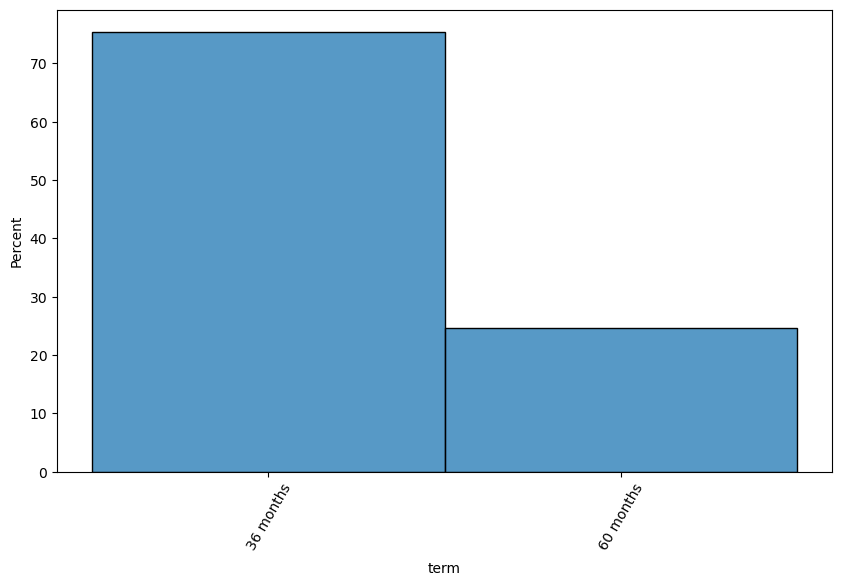

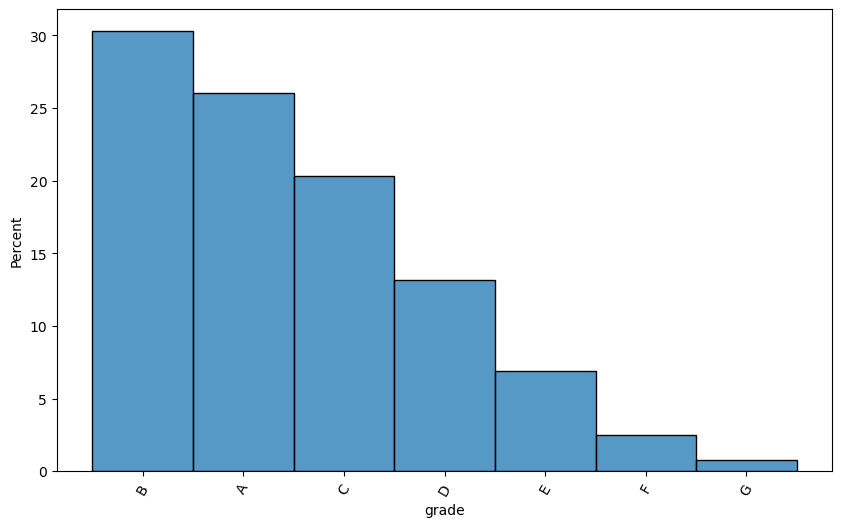

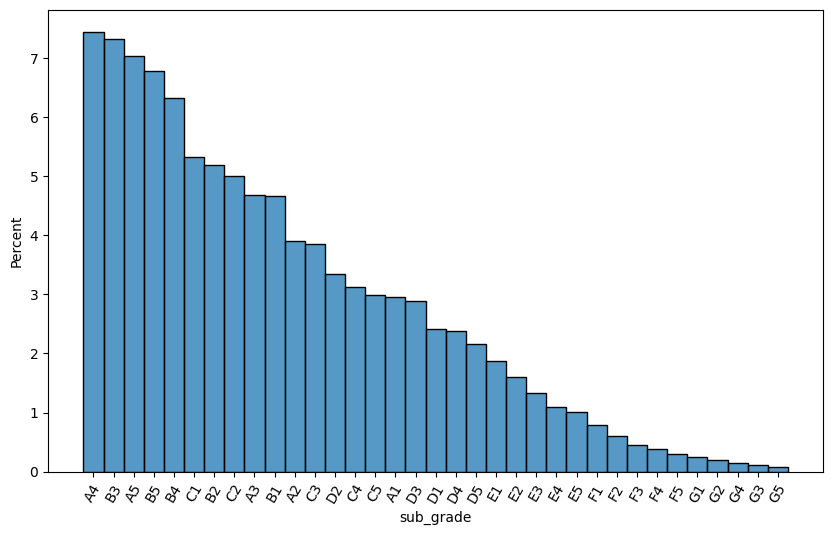

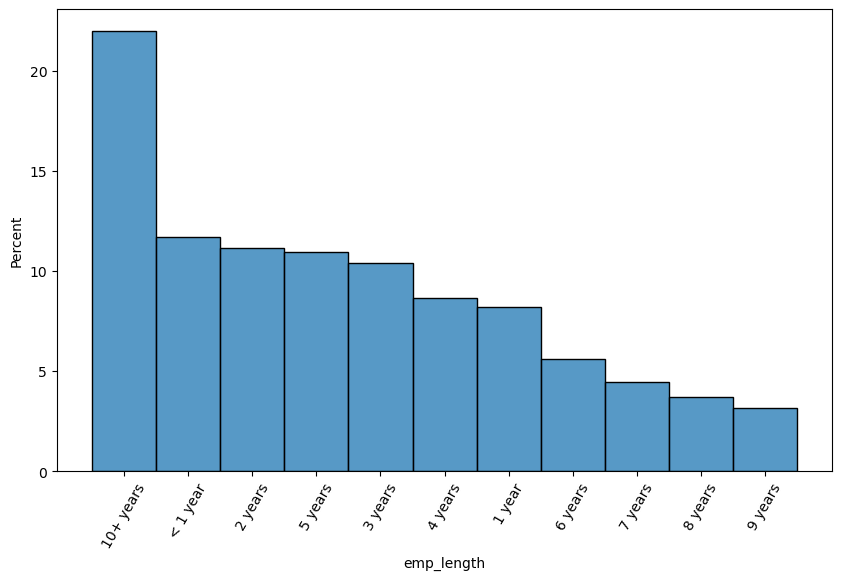

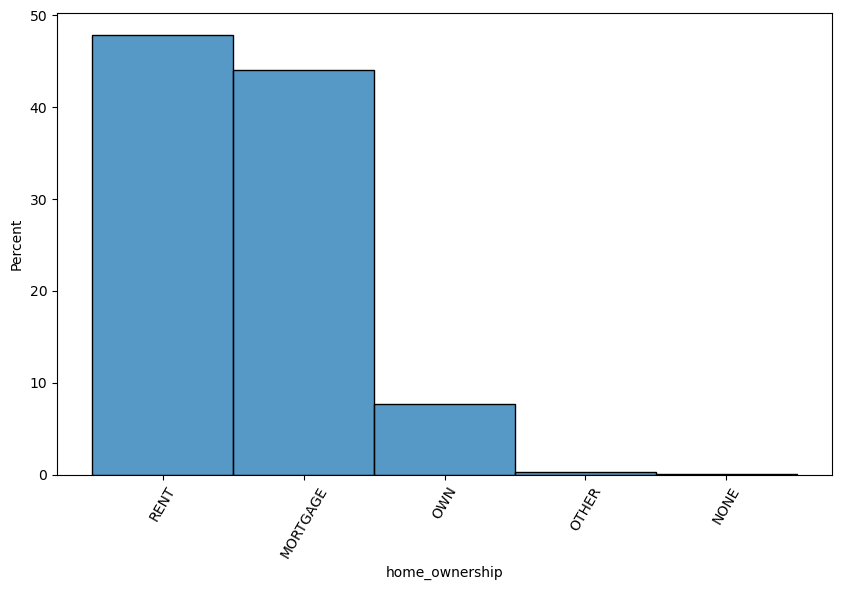

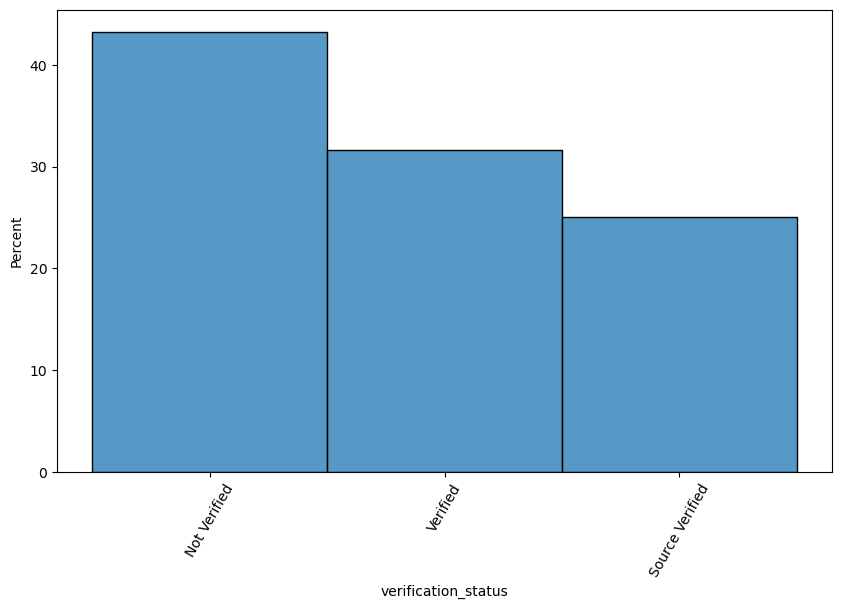

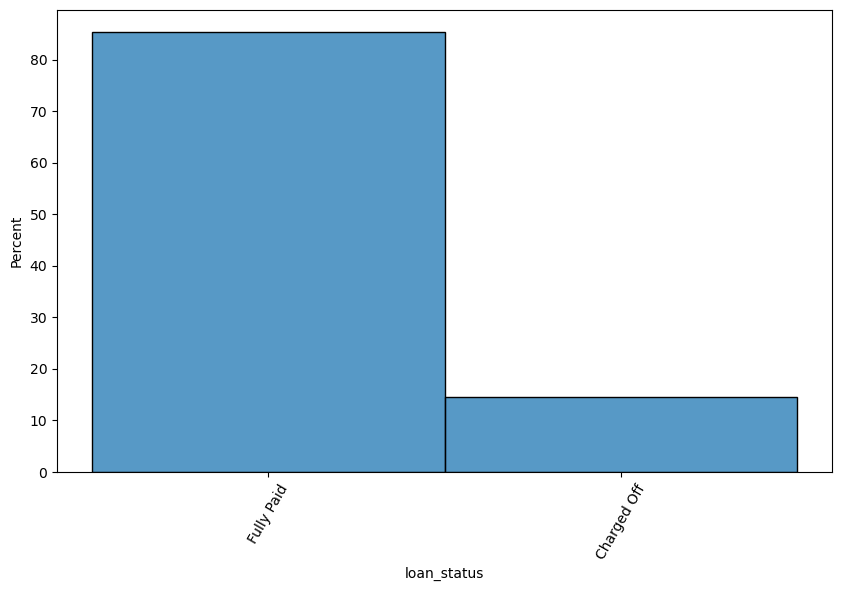

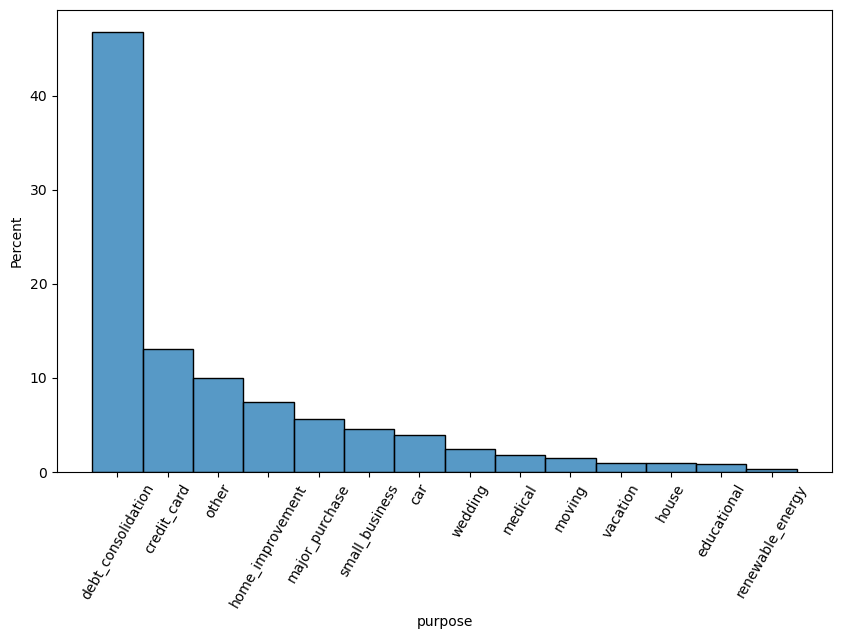

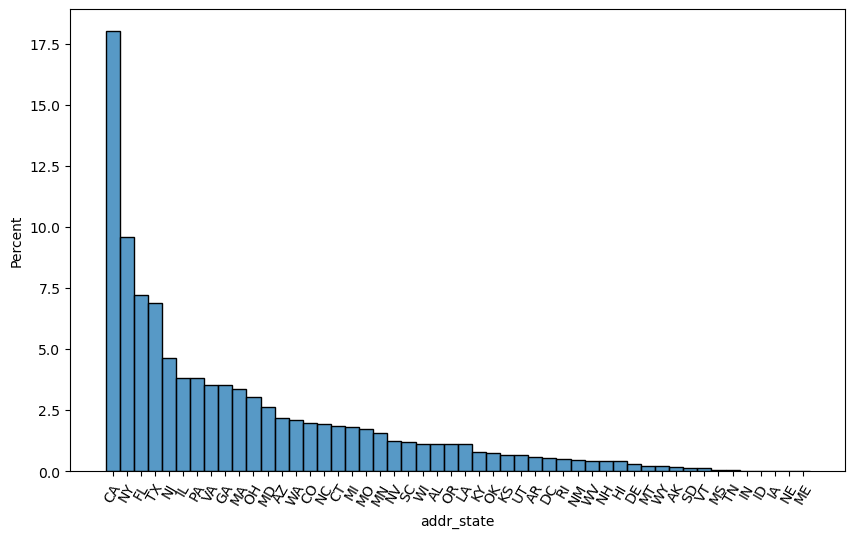

In [64]:
for column_name in categorical_columns:
    if column_name == "pub_rec_bankruptcies":
        continue
    hist_plot(loan,column_name,kdeSetting=False,multipleSetting="stack")

#### Observations on univariate analysis of Categorical columns
No direct relation can be established with any of the categorical data to loan default based on graphs shown using histogram. However we do have insights about some of the data variables and those are as follows:

- **emp_length** : we have seen it in numerical columns that maximum loans are from 10 years + experience people
- **home_ownership** : majority of people live in rented or mortgage house
- **loan_status** :  We can be seen that ~85% of loans are fully paid 
- **term** : Most people prefer 36 months duration
- **grade** : Maximum loans are from B, A, C and D grade
- **sub_grade** : maximum loans are from B grade, lower A and upper C sub grades 
- **purpose** : It can be seen that maximum loan is for debt_consolidation, which seems fishy, we will investigate further
- **addr_state** : It seems company is more active in CA,NY and FL states

Let's investigate further and try to come up with formula or observation which can help identify default

## 3.1 Segmented Univariate Analysis
As we know the business problem which we are trying to solve is to identify loan defaults based on different parameters which we have in the dataset. So now we will plot all the parameters on histogram by segmenting it based on loan status and normalizing scale to figure out which data points contribute towards default of loans

For this we will use our old function with some configuration parameters as follows

In [65]:
# treating pub_rec_bankruptcies "Unidentified" records to numerical value inorder to plot
loan["pub_rec_bankruptcies"] = loan["pub_rec_bankruptcies"].apply(lambda x : x if x!="Unidentified" else 5.0)

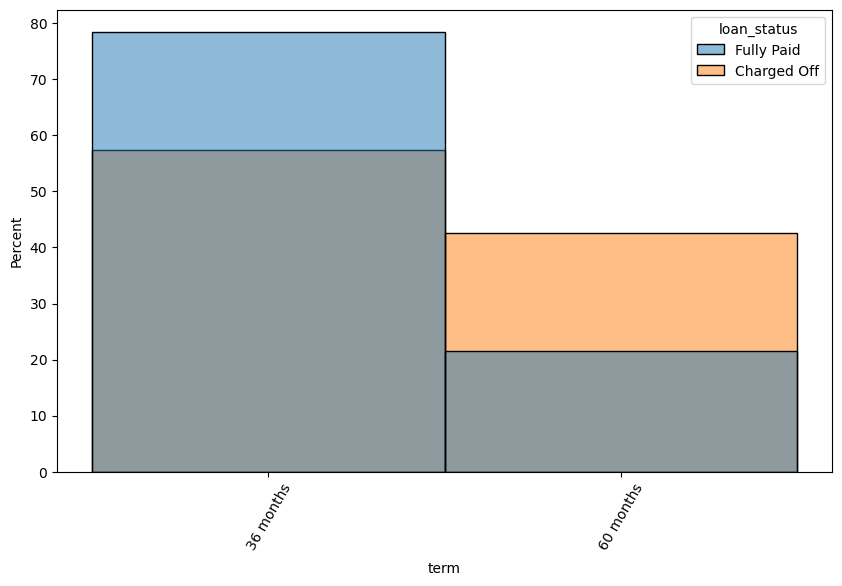

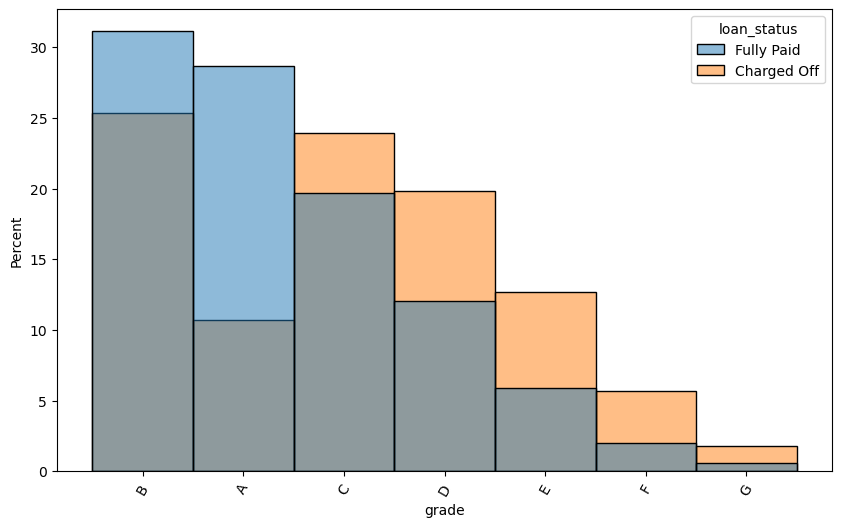

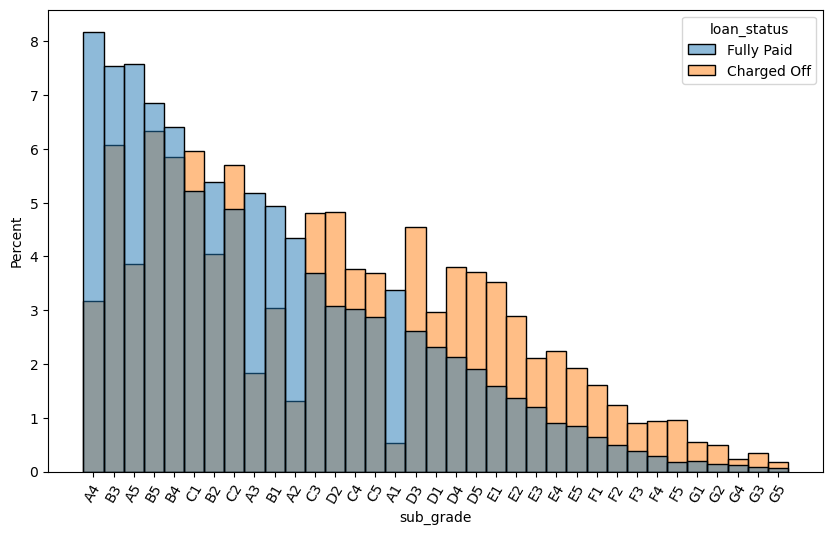

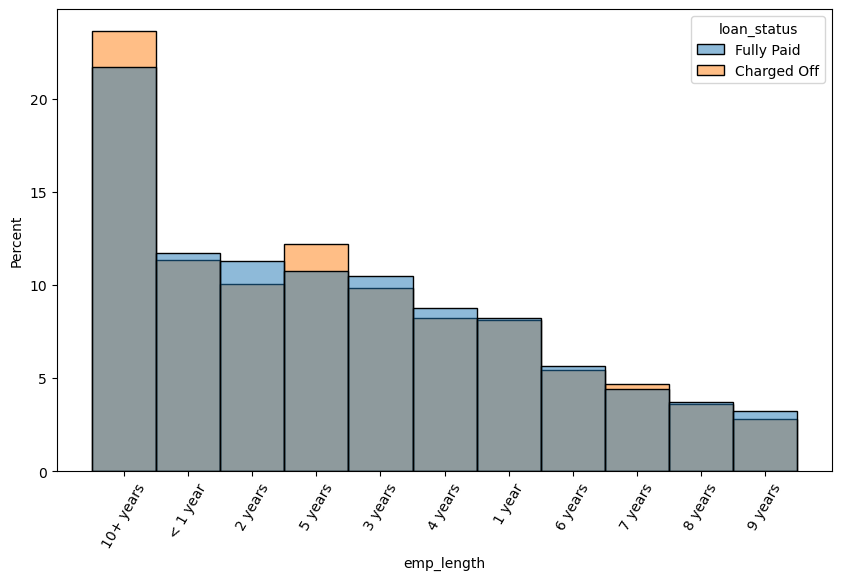

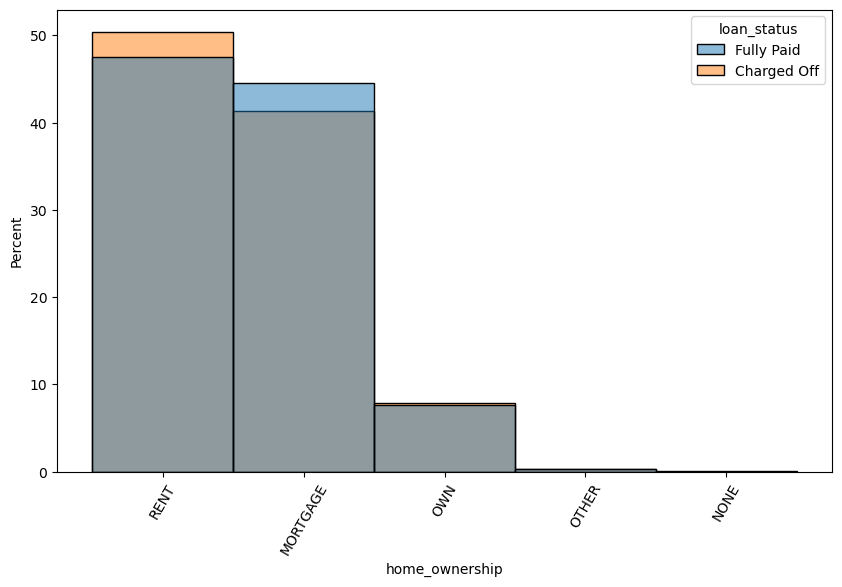

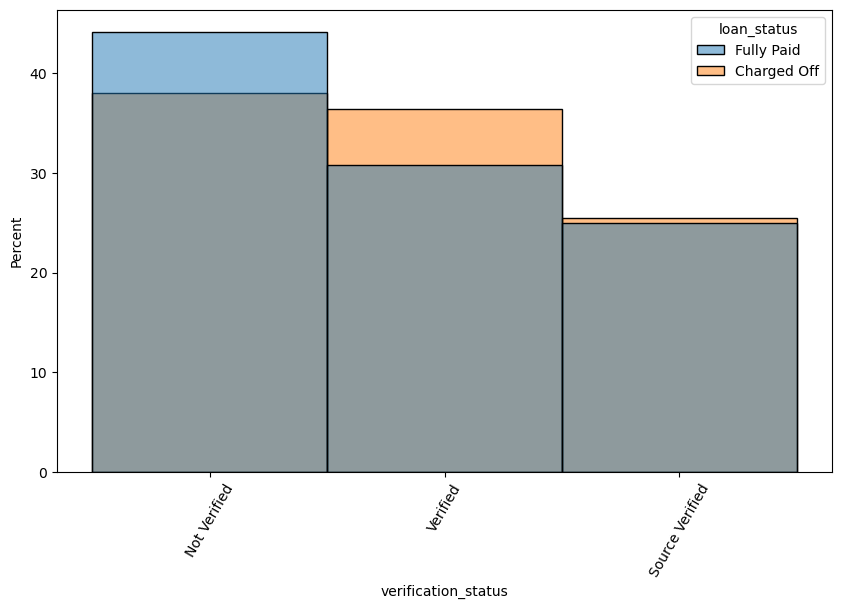

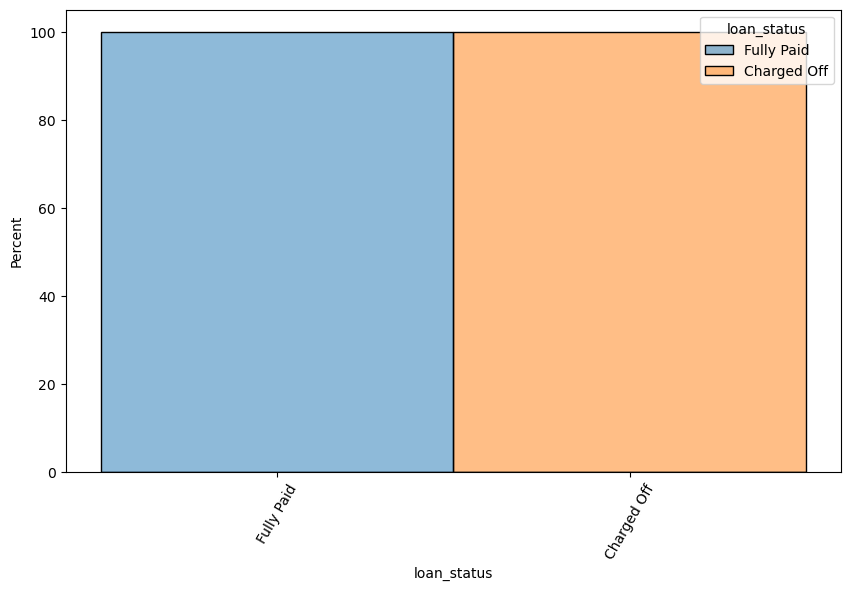

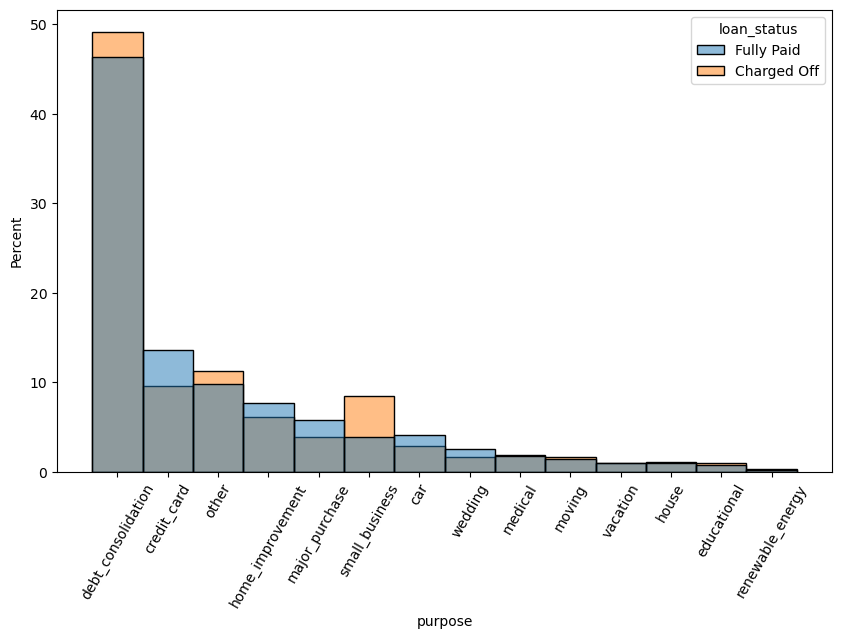

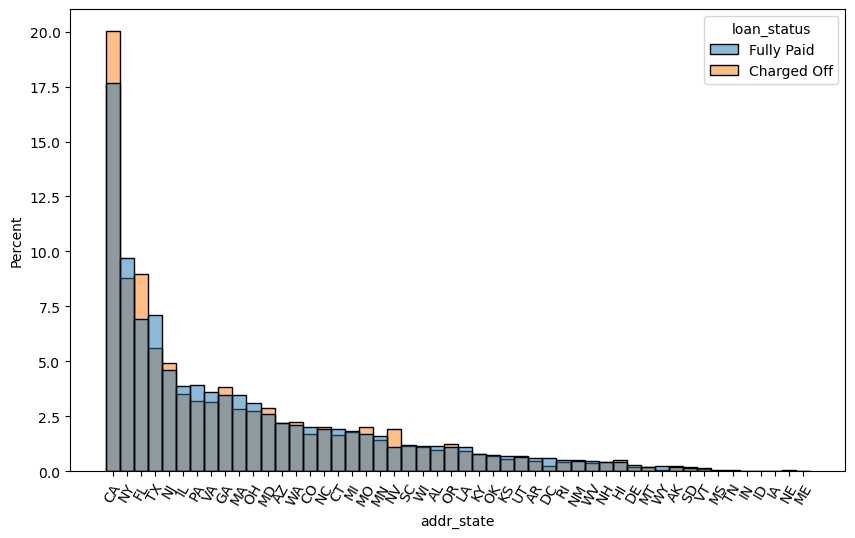

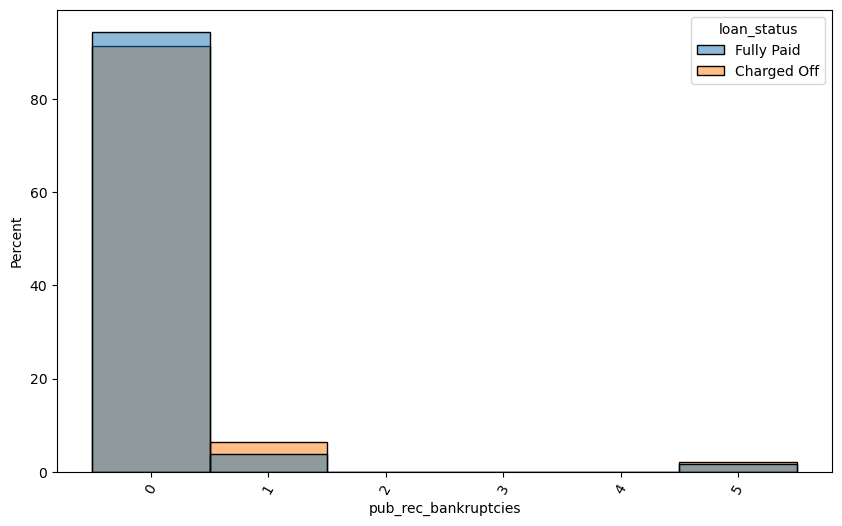

In [66]:
for column_name in categorical_columns:   
    hist_plot(loan,column_name,kdeSetting=False,multipleSetting="layer",commonNormSetting=False,hueSetting="loan_status")

#### Observations on segmented univariate analysis of Categorical columns
we do have insights about some of the data variables when we add "common_norm=False" to our graph setting and those are as follows:

- **term** : 60 Months term is more prone to default
- **grade** : lower grade from C are more prone to default than A and B grade
- **sub_grade** : higher grade means lower default 
- **emp_length** : it is surprising that lower years of experience has lesser default
- **home_ownership** : people staying on rent are more prone to defaulting the loan than others
- **verification_status** : surprisingly Not verified status are less prone to default than verified
- **purpose** : Small business and debt consolidation are more prone to default
- **addr_state** : CA, FL and NV are more prone to default than other states
- **pub_rec_bankruptcies** : any record or unidentified records are more prone to default than 0 records

We will further investigate and try to come up with formula or observation which can help identify default

Now Lets plot numerical columns 

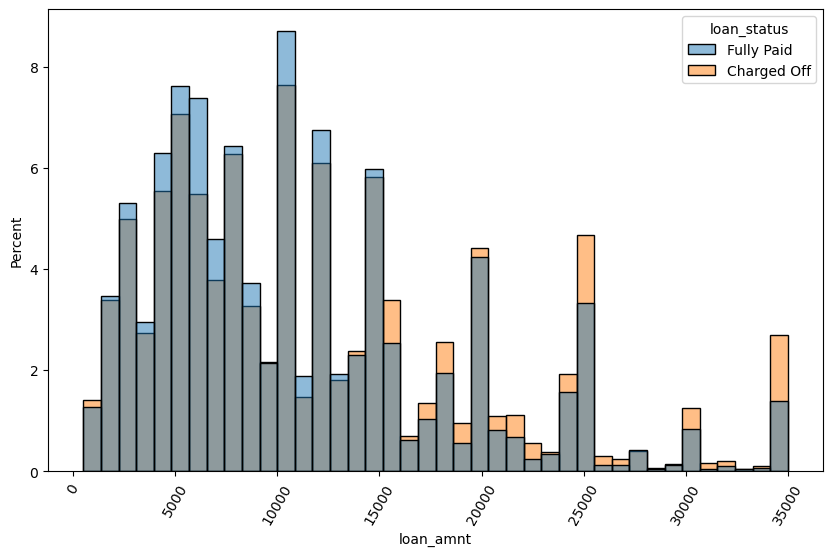

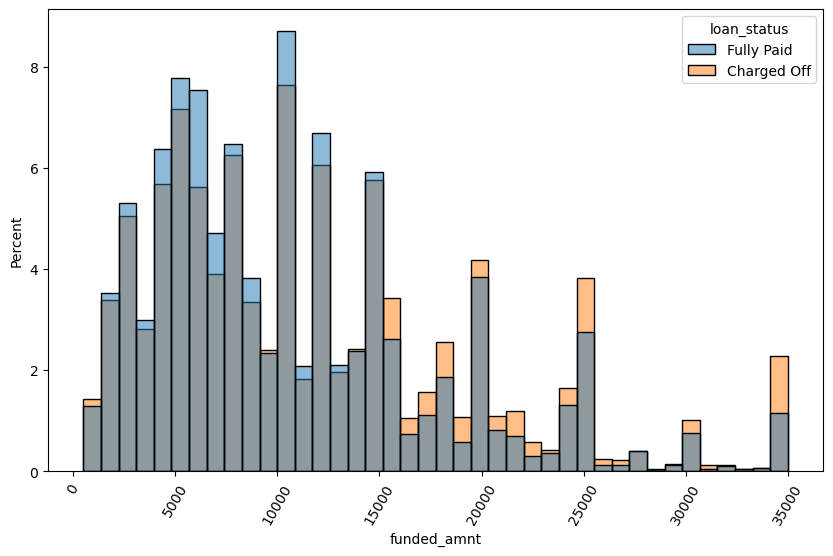

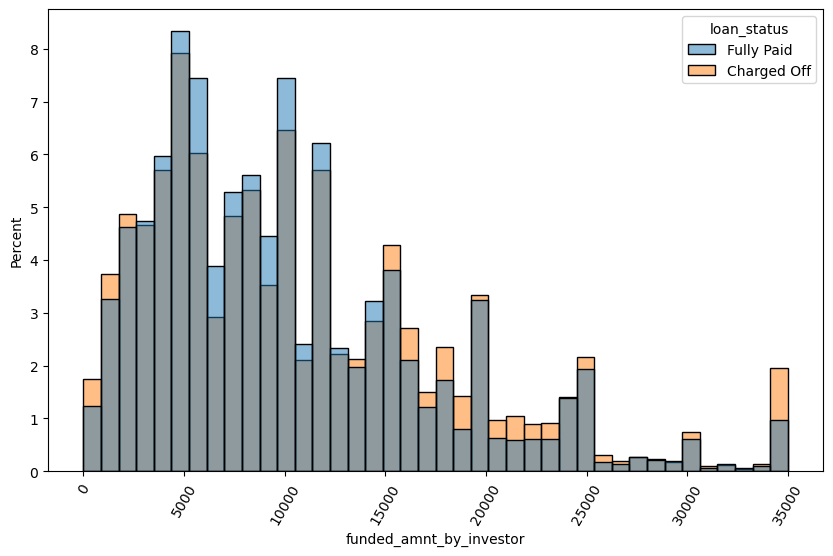

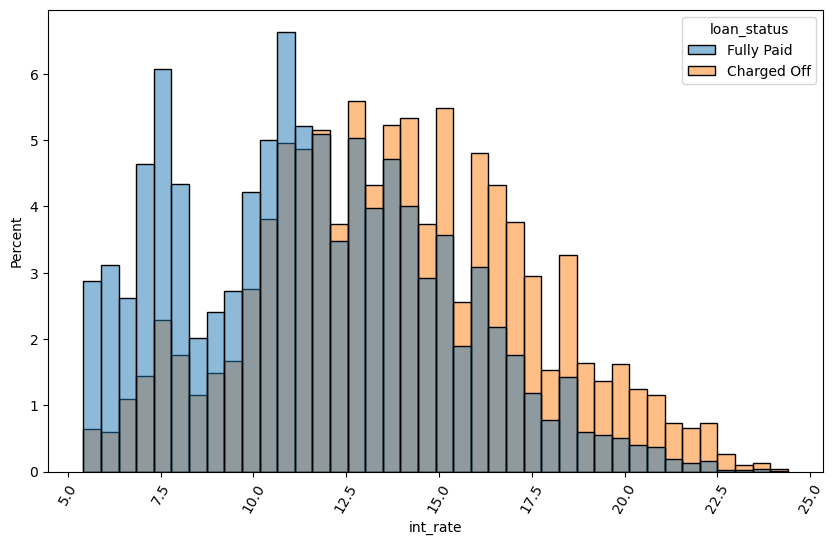

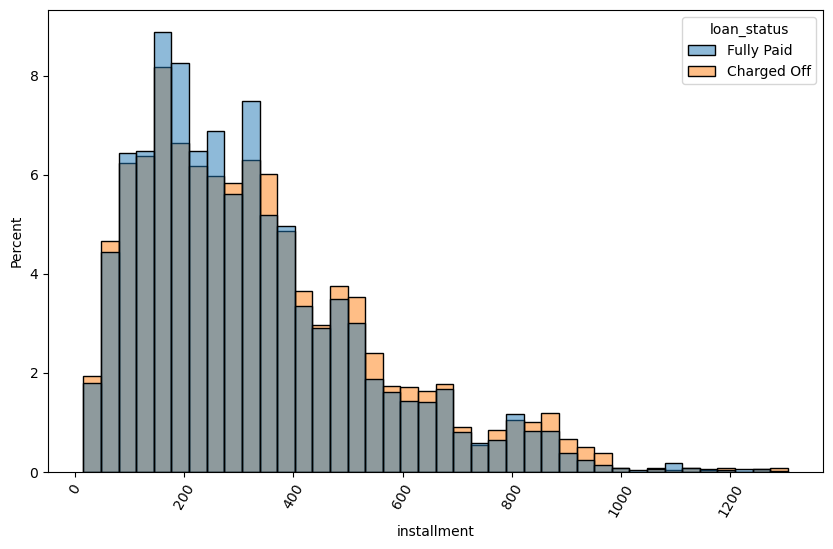

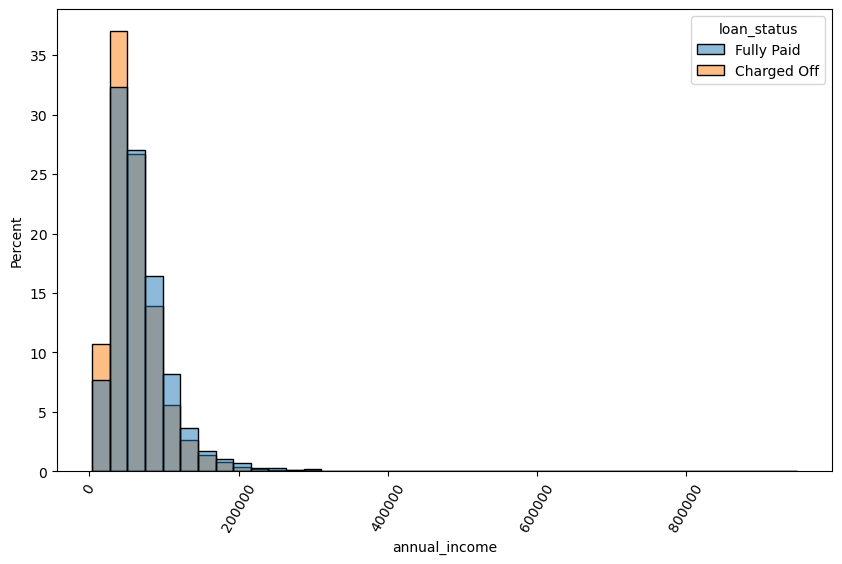

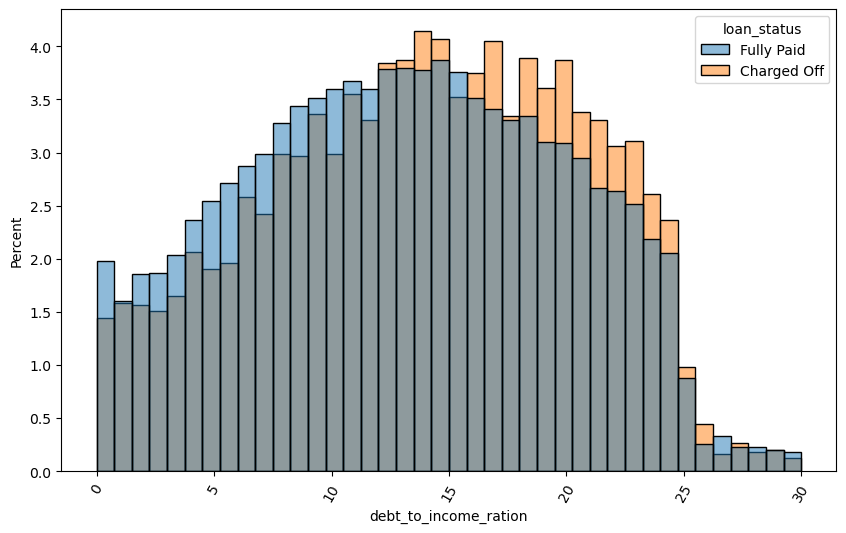

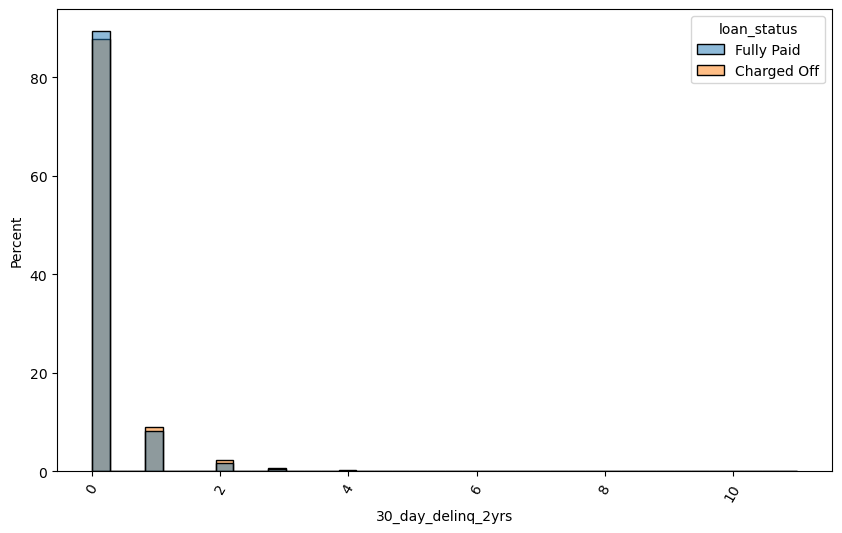

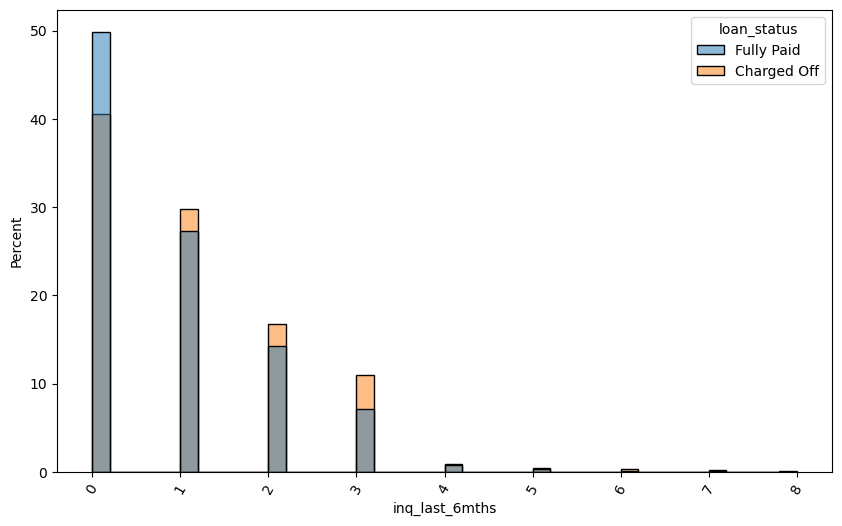

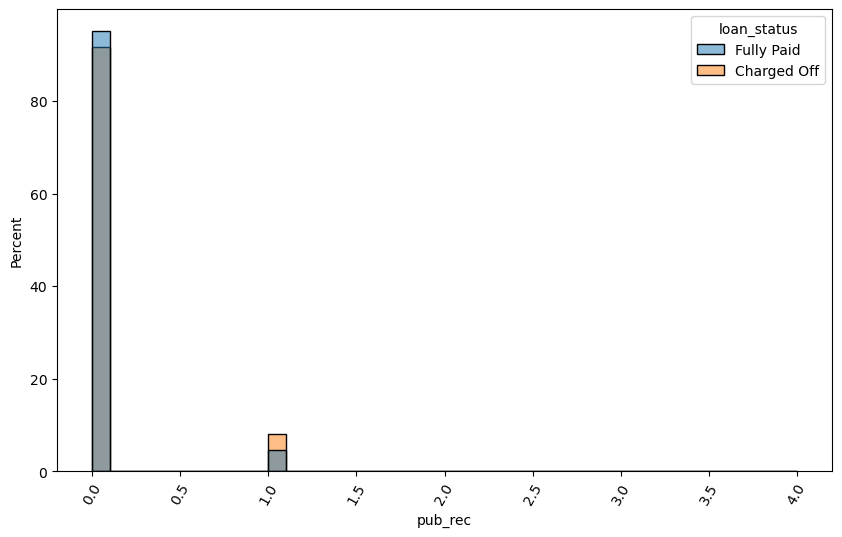

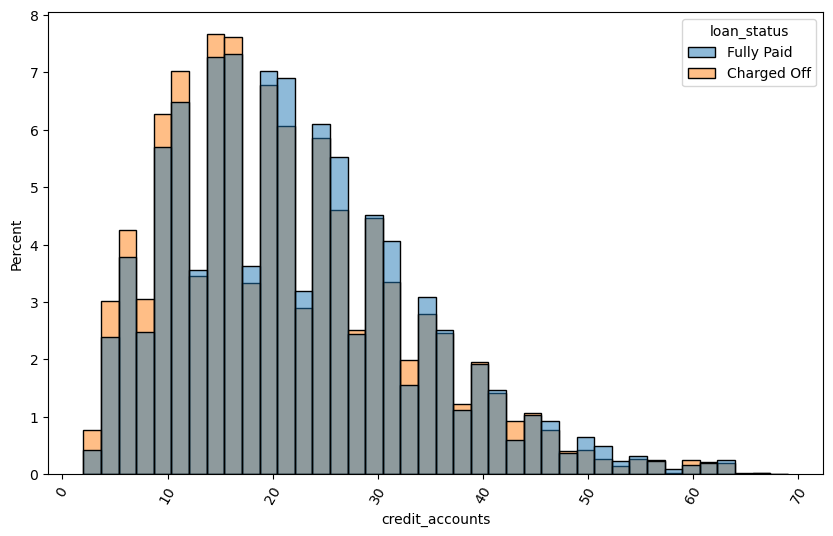

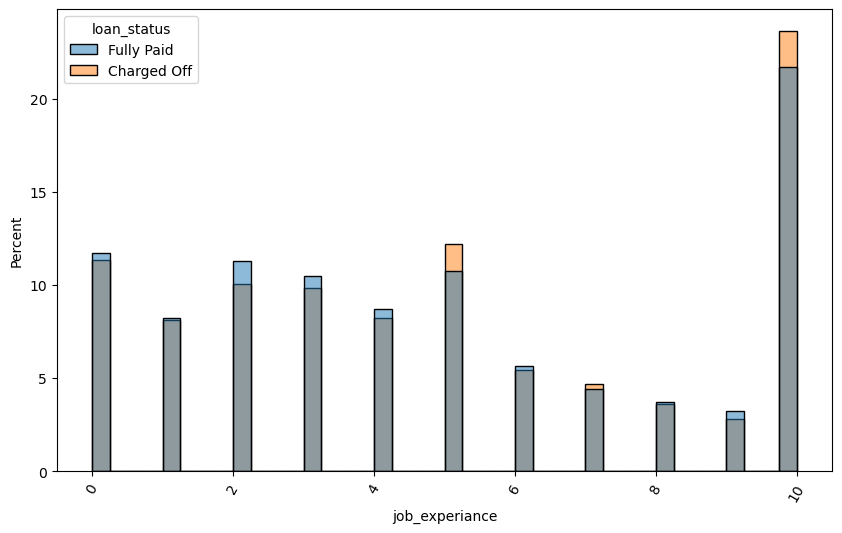

In [67]:
for column_name in numerical_columns:
    hist_plot(loan,column_name,kdeSetting=False,multipleSetting="layer",commonNormSetting=False,hueSetting="loan_status")


#### Observations on segmented univariate analysis of numerical columns
We do have insights about some of the data variables when we add "common_norm=False" to our graph setting and those are as follows:

- **int_rate** : it can be clearly seen that interest rate more than 12.5 is more prone to default
- **installment** : we can see 100 to 300 number of installments are less prone to default
- **loan_amnt** : it can be seen that loan above 15k are more prone to default than loan below 15k
- **funded_amnt** : it is same as loan amount in terms of default
- **funded_amnt_by_investor** : same as funded_amnt
- **annual_income** : loans given to 0 to 10k annual income are prone to default
- **debt_to_income_ration** : It can be seen clearly that if debt to income ratio is greater than 12 then loan are more prone to default
- **30_day_delinq_2yrs & pub_rec** : Nothing significant can be deduced out of this variable
- **inq_last_6mths** : lesser or 0 inquiry means better for full paid
- **credit_accounts** : 15 or lesser credit accounts are more prone to default 
- **job_experiance** : Surprisingly lesser job experience applicants are less prone to default

We will further investigate and try to come up with formula or observation which can help identify default

## 4. Bivariate Analysis
So now we will go ahead and perform Bivariate Analysis on the given numerical and categorical columns considering loan status as secondary column for comparison as it is the business purpose of the case study to find correlation between loan defaults and different data points. But first we will plot correlation graph to check if there are any relation between all the parameters

#### Numerical columns correlation

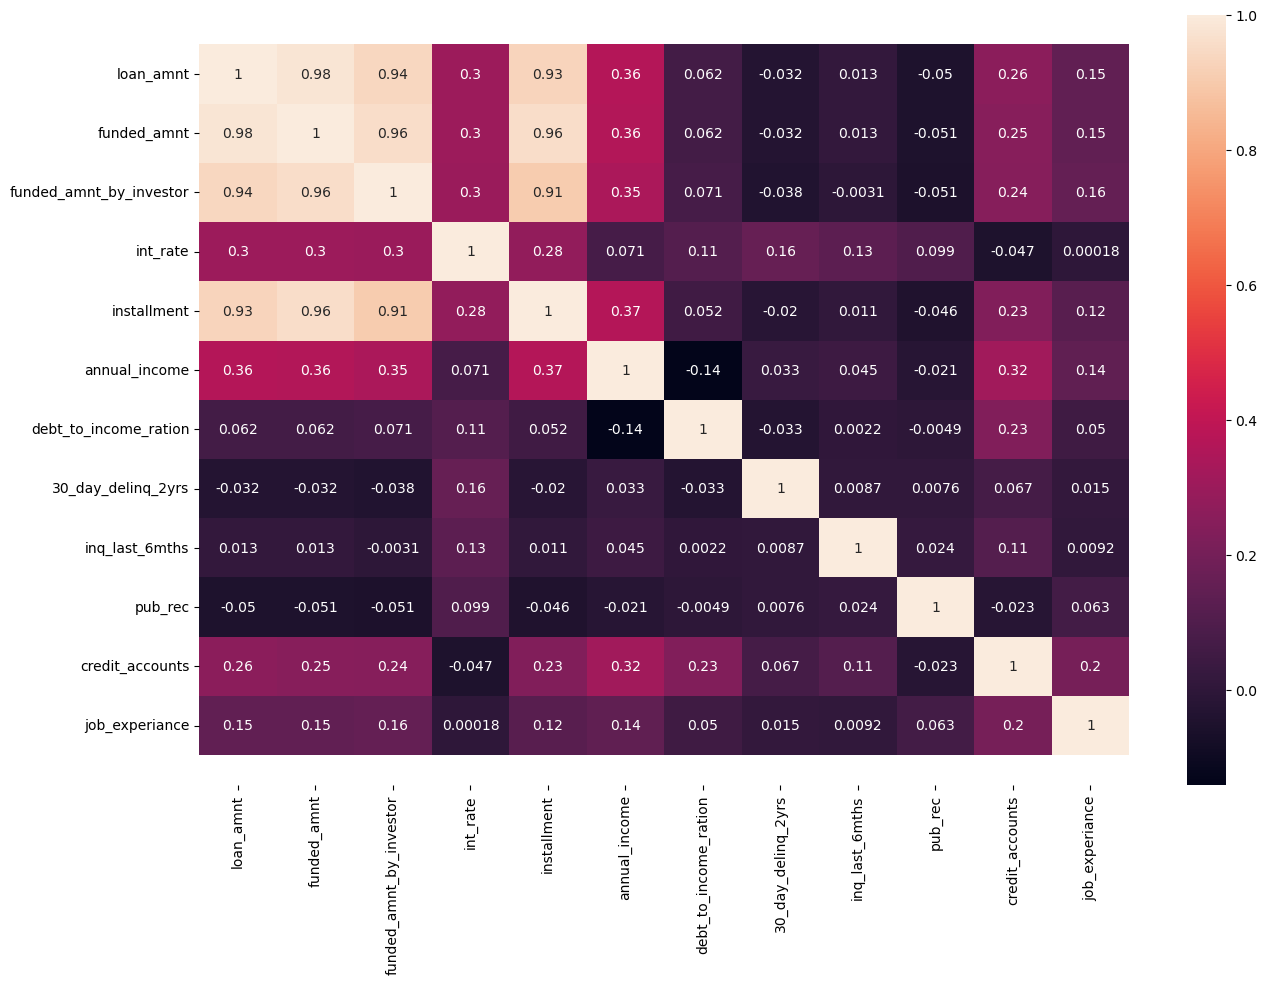

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data=loan[numerical_columns].corr(),annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Observation of numerical columns bivariate analysis
- Higher amount means higher installments which can be seen here with strong correlation.
- Relatively positive correlation between loan_amnt and annual_income can be see which is obvious.
- We can observe negative correlation between annual_inc and dti
- There exist strong correlation between loan_amount/funded_amnt/funded_amnt_inv as mostly all loans are funded
- higher loan amount attract higher interest rates that can be seen here


#### Categorical columns with Numerical columns

We will try to plot correlation between categorical columns with numerical columns based on our earlier observation

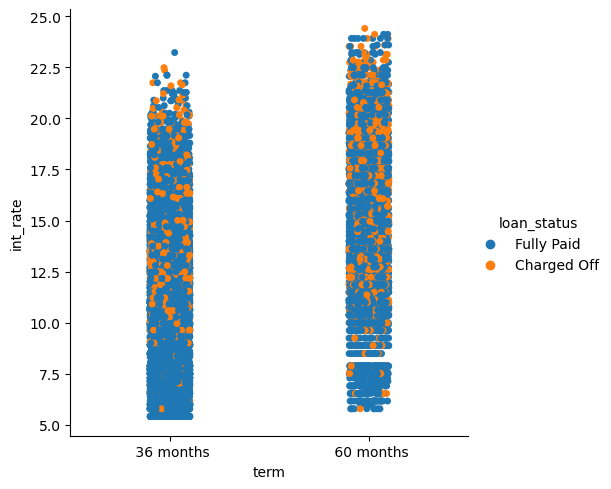

In [69]:
# term against int_rate
for i,c_column in enumerate(["term"]):
    for j,n_column in enumerate(["int_rate"]):
        g = sns.catplot(x=c_column, y=n_column, hue='loan_status', data=loan, hue_order=['Fully Paid','Charged Off'])

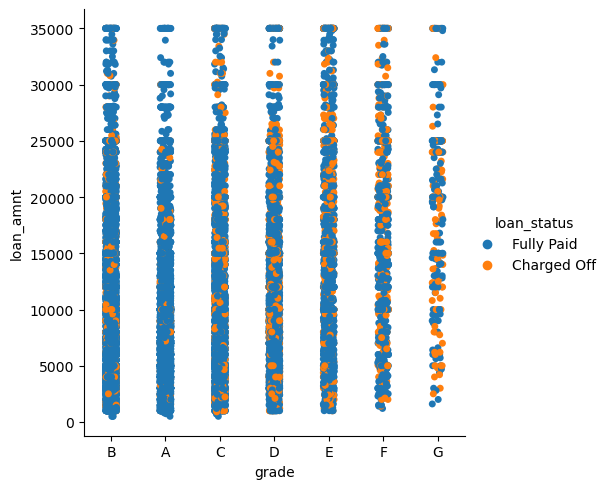

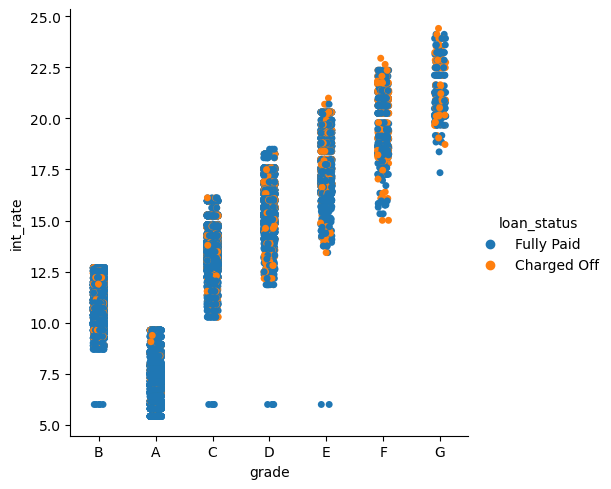

In [70]:
# grade against loan_amnt and int_rate
for i,c_column in enumerate(["grade"]):
    for j,n_column in enumerate(["loan_amnt","int_rate"]):
        g = sns.catplot(x=c_column, y=n_column, hue='loan_status', data=loan, hue_order=['Fully Paid','Charged Off'])

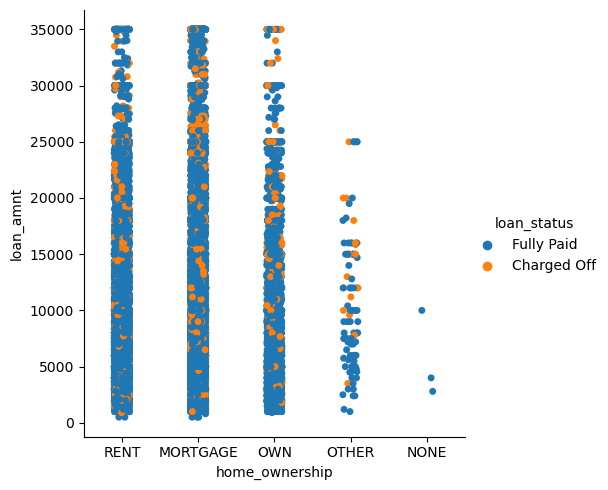

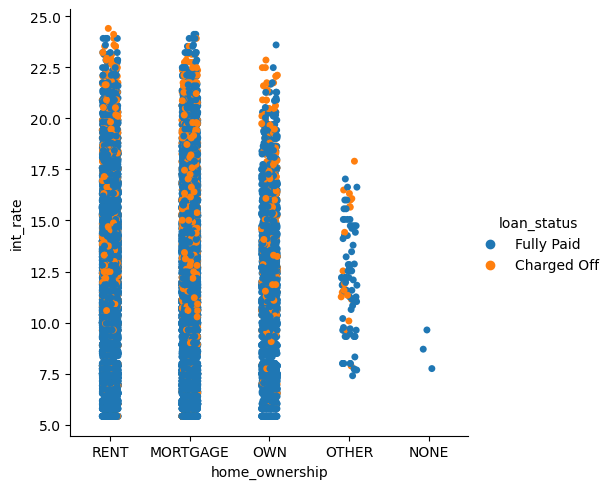

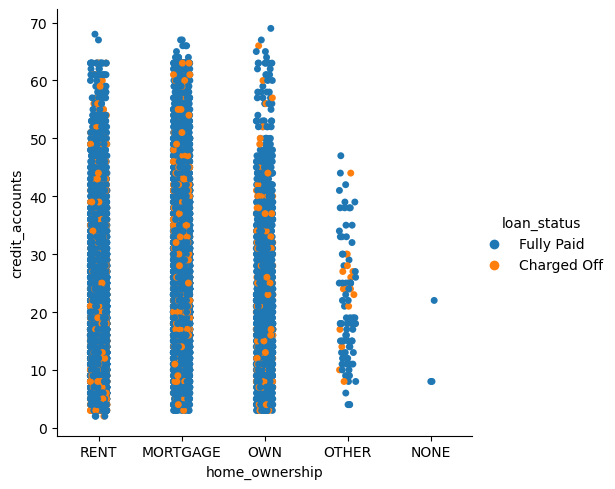

In [71]:
# home_ownership against loan_amnt, int_rate and credit_accounts
for i,c_column in enumerate(["home_ownership"]):
    for j,n_column in enumerate(["loan_amnt","int_rate","credit_accounts"]):
        g = sns.catplot(x=c_column, y=n_column, hue='loan_status', data=loan, hue_order=['Fully Paid','Charged Off'])

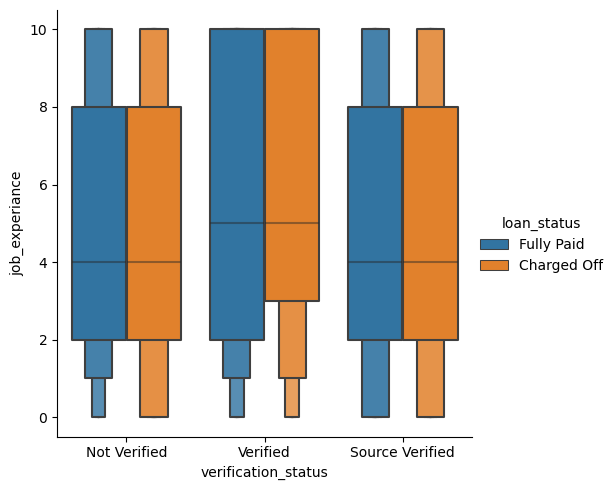

In [72]:
# verification_status against job_experiance
for i,c_column in enumerate(["verification_status"]):
    for j,n_column in enumerate(["job_experiance"]):
        g = sns.catplot(x=c_column, y=n_column, hue='loan_status', data=loan, hue_order=['Fully Paid','Charged Off'], kind="boxen")

Text(0.5, 1.0, 'Defaulted based on purpose')

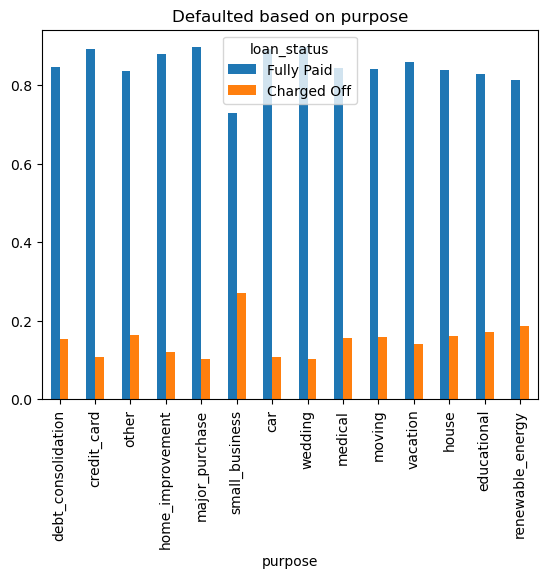

In [73]:
# purpose against loan_status
purpose= pd.crosstab(index=loan['purpose'],columns=loan['loan_status'],normalize='index')
purpose.plot.bar();
plt.title("Defaulted based on purpose")

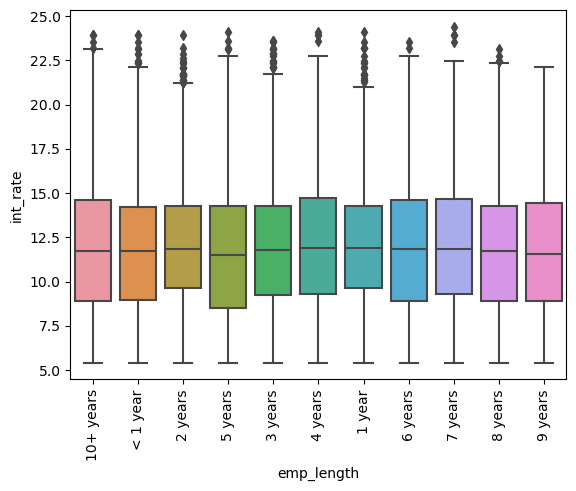

In [74]:
# emp_length against int_rate
sns.boxplot(data=loan,x='emp_length',y='int_rate')
plt.xticks(rotation=90);

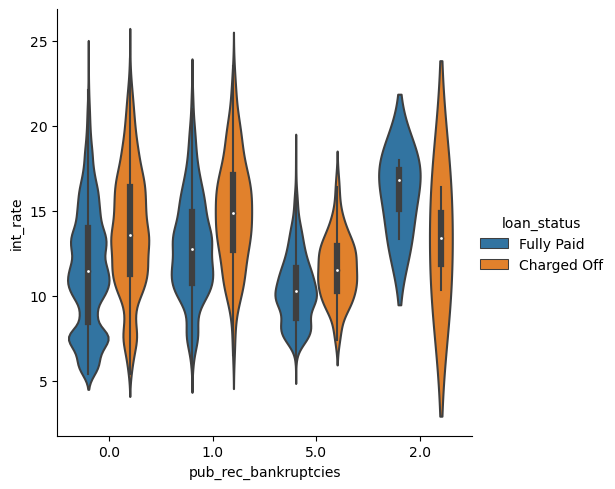

In [75]:
# pub_rec_bankruptcies against int_rate
for i,c_column in enumerate(["pub_rec_bankruptcies"]):
    for j,n_column in enumerate(["int_rate"]):
        g = sns.catplot(x=c_column, y=n_column, hue='loan_status', data=loan, hue_order=['Fully Paid','Charged Off'],kind="violin")


#### Observations on bivariate analysis for categorical columns with numerical columns
We can easily observe following things in the analysis:

- **home_ownership vs loan_amnt, int_rate and credit_accounts** : home ownership of mortgage type with higher loan mount is prone to default, also interest rate is not driving factor in this category and credit_account does not have any relation with home ownership
- **verification_status vs job_experiance** : verified loan with lesser job experience are less prone to default
- **purpose vs loan_status** : small business as purpose has highest default rate
- **emp_length vs int_rate** : there is no relation between emp_length vs int_rate all emp_length data are equally distributed
- **term vs int_rate** : We can see that lower term and lower interest rate has higher full payment status
- **grade vs loan_amnt and int_rate** : higher interest rate and lower grades are prone to default
- **pub_rec_bankruptcies vs int_rate** : people with pub_rec_bankruptcies has higher chances of default irrespective of interest rate


## 5. Recommendation

Based on all the analysis done on different parameters of the data provided we can conclude following:

We cannot simply consider one or two variables to predict the default, here now we will define 14 parameters that are needed to be considered while giving a loan. In an a application if more than 5 matching parameters are there then we should avoid the loan for such applications

- purpose - Purpose of the loan is **Small Business or Debt Consolidation**
- annual_income - Annual income is **10K or less than 10K**
- debt_to_income_ration - DTI is **12 or more**
- loan_amnt - Loan amount is **15K or more**
- int_rate - Interest rate is **12.5 or more**
- grade - Grades given by LC are **C,D,E,F or G**
- term - Loan tenure selected is **60 months**
- home_ownership - Home ownership is **Rent**
- verification_status - Verification status is **Verified**
- inq_last_6mths - **2 or more** inquiries in last 6 months
- add_state - States are one of the following **CA, FL or NV**
- pub_rec_bankruptcies - Any public record of bankruptcies
- credit_accounts - Credit accounts are **15 or less**
- job_experiance - Job experience is **5 or more**




----------------------------------------------------------------------------------------------------------------

#### Reference
https://www.geeksforgeeks.org/select-columns-with-specific-data-types-in-pandas-dataframe/ <br>
https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/<br>
https://stackoverflow.com/questions/63373194/how-to-plot-percentage-with-seaborn-distplot-histplot-displot<br>
https://seaborn.pydata.org/generated/seaborn.histplot.html<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html<br>
https://stackoverflow.com/questions/56942670/first-and-last-row-cut-in-half-of-heatmap-plot<br>
https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/<br>
https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset <br>



#### Technologies used and versions
- pandas  1.3.5
- numpy  1.21.6
- matplotlib  3.1.1
- seaborn  0.12.2